In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#The MTA turnstile data is quite complex and not immediately useful. 
#Here’s a snippet of the raw data obtained from the MTA
#STATION: is the name of the subway station
#C/A or Control Area is basically a “Fare Control Area”, a vestibule with a booth
#UNIT or remote unit is a bank of turnstiles in the control area.
#SCP is Subunit Channel Position or the unique identifier for the turnstile in that control area.
#ENTRIES and EXITS are the turnstile’s counter. It’s recorded 6 times a day in 4 hour blocks, and it’s a running cumulative total.

One caveat: Different stations on different lines but on the same street may have the same station name, e.g. The station designation “23 ST” is used for 4 unique stations: C/E, 1, F/M, and 6 line. They have different C/A and remote UNIT. As we’ll see later, this may affect our aggregation.

In [2]:
df1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210306.txt')
df2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210313.txt')
df3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210320.txt')
df4 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210327.txt')
df5 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210403.txt')
df6 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210410.txt')
df7 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210417.txt')
df8 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210424.txt')
df9 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210501.txt')
df10 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210508.txt')
df11 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210515.txt')
df12 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210522.txt')
df13 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210529.txt')
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13], ignore_index = True)

In [3]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,03:00:00,REGULAR,7537255,2570434
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,07:00:00,REGULAR,7537260,2570445
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,11:00:00,REGULAR,7537285,2570500
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,15:00:00,REGULAR,7537354,2570546
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,19:00:00,REGULAR,7537501,2570582


In [4]:
df.tail(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
2717747,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/27/2021,13:00:00,REGULAR,5554,577
2717748,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/27/2021,17:00:00,REGULAR,5554,577
2717749,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/27/2021,21:00:00,REGULAR,5554,577
2717750,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,01:00:00,REGULAR,5554,577
2717751,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,05:00:00,REGULAR,5554,577
2717752,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,08:20:35,REGULAR,5554,577
2717753,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,09:00:00,REGULAR,5554,577
2717754,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,13:00:00,REGULAR,5554,577
2717755,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,17:00:00,REGULAR,5554,577
2717756,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,21:00:00,REGULAR,5554,577


In [5]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [6]:
# removing the spaces in EXITS column
"""
df.columns = df.columns.str.strip()
"""
df.rename(columns={'EXITS                                                               ':'EXITS'}, inplace=True)

In [7]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [8]:
df.shape

(2717757, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717757 entries, 0 to 2717756
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   C/A       object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 228.1+ MB


In [10]:
df.isna().head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isna().sum()

C/A         0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISION    0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
dtype: int64

In [12]:
df.STATION.value_counts()

34 ST-PENN STA     55756
FULTON ST          52438
GRD CNTRL-42 ST    48626
23 ST              39870
86 ST              35613
                   ...  
CHAUNCEY ST         1622
HARLEM 148 ST       1622
SUTTER AV           1092
CLEVELAND ST        1092
ORCHARD BEACH        223
Name: STATION, Length: 379, dtype: int64

In [13]:
df.DATE.value_counts().sort_index()

02/27/2021    29985
02/28/2021    29763
03/01/2021    29868
03/02/2021    29803
03/03/2021    29871
              ...  
05/24/2021    29828
05/25/2021    29855
05/26/2021    29834
05/27/2021    29905
05/28/2021    29894
Name: DATE, Length: 91, dtype: int64

In [14]:
df[ (df.STATION == '34 ST-PENN STA')].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
55099,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,02/27/2021,03:00:00,REGULAR,233373,709846
55100,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,02/27/2021,07:00:00,REGULAR,233375,709858
55101,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,02/27/2021,11:00:00,REGULAR,233392,709913
55102,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,02/27/2021,15:00:00,REGULAR,233445,709956
55103,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,02/27/2021,19:00:00,REGULAR,233493,710006


In [15]:
df[ (df.STATION == 'HARLEM 148 ST')].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
175070,R309,R345,00-00-00,HARLEM 148 ST,3,IRT,02/27/2021,03:00:00,REGULAR,3194930,4901515
175071,R309,R345,00-00-00,HARLEM 148 ST,3,IRT,02/27/2021,07:00:00,REGULAR,3194949,4901526
175072,R309,R345,00-00-00,HARLEM 148 ST,3,IRT,02/27/2021,11:00:00,REGULAR,3195020,4901586
175073,R309,R345,00-00-00,HARLEM 148 ST,3,IRT,02/27/2021,15:00:00,REGULAR,3195092,4901690
175074,R309,R345,00-00-00,HARLEM 148 ST,3,IRT,02/27/2021,19:00:00,REGULAR,3195147,4901797


In [16]:
df[ (df.STATION == 'SUTTER AV')].tail(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
2546184,H037,R349,00-00-01,SUTTER AV,L,BMT,05/27/2021,09:00:00,REGULAR,49543,27007
2546185,H037,R349,00-00-01,SUTTER AV,L,BMT,05/27/2021,13:00:00,REGULAR,49655,27069
2546186,H037,R349,00-00-01,SUTTER AV,L,BMT,05/27/2021,17:00:00,REGULAR,49817,27154
2546187,H037,R349,00-00-01,SUTTER AV,L,BMT,05/27/2021,21:00:00,REGULAR,49941,27232
2546188,H037,R349,00-00-01,SUTTER AV,L,BMT,05/28/2021,01:00:00,REGULAR,49962,27272
2546189,H037,R349,00-00-01,SUTTER AV,L,BMT,05/28/2021,05:00:00,REGULAR,49966,27277
2546190,H037,R349,00-00-01,SUTTER AV,L,BMT,05/28/2021,09:00:00,REGULAR,50169,27347
2546191,H037,R349,00-00-01,SUTTER AV,L,BMT,05/28/2021,13:00:00,REGULAR,50267,27404
2546192,H037,R349,00-00-01,SUTTER AV,L,BMT,05/28/2021,17:00:00,REGULAR,50409,27471
2546193,H037,R349,00-00-01,SUTTER AV,L,BMT,05/28/2021,21:00:00,REGULAR,50494,27545


In [17]:
df[ (df.STATION == '86 ST')].tail(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
2676758,R250,R179,00-00-0B,86 ST,456,IRT,05/27/2021,08:00:00,REGULAR,513376,695320
2676759,R250,R179,00-00-0B,86 ST,456,IRT,05/27/2021,12:00:00,REGULAR,513647,695863
2676760,R250,R179,00-00-0B,86 ST,456,IRT,05/27/2021,16:00:00,REGULAR,514132,696263
2676761,R250,R179,00-00-0B,86 ST,456,IRT,05/27/2021,20:00:00,REGULAR,514799,696562
2676762,R250,R179,00-00-0B,86 ST,456,IRT,05/28/2021,00:00:00,REGULAR,514921,696747
2676763,R250,R179,00-00-0B,86 ST,456,IRT,05/28/2021,04:00:00,REGULAR,514933,696760
2676764,R250,R179,00-00-0B,86 ST,456,IRT,05/28/2021,08:00:00,REGULAR,514986,697162
2676765,R250,R179,00-00-0B,86 ST,456,IRT,05/28/2021,12:00:00,REGULAR,515247,697711
2676766,R250,R179,00-00-0B,86 ST,456,IRT,05/28/2021,16:00:00,REGULAR,515766,698137
2676767,R250,R179,00-00-0B,86 ST,456,IRT,05/28/2021,20:00:00,REGULAR,516255,698415


In [18]:
df['TURNSTILE'] = df['C/A'] + df['UNIT'] + df['SCP']

In [19]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,03:00:00,REGULAR,7537255,2570434,A002R05102-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,07:00:00,REGULAR,7537260,2570445,A002R05102-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,11:00:00,REGULAR,7537285,2570500,A002R05102-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,15:00:00,REGULAR,7537354,2570546,A002R05102-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,19:00:00,REGULAR,7537501,2570582,A002R05102-00-00


In [20]:
# Get the difference between Entries and Exits counters in new columns. 
df['d_Entries'] = df.ENTRIES.shift(-1)-df.ENTRIES
df['d_Exits'] = df.EXITS.shift(-1) - df.EXITS

In [21]:
df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,d_Entries,d_Exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,03:00:00,REGULAR,7537255,2570434,A002R05102-00-00,5.0,11.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,07:00:00,REGULAR,7537260,2570445,A002R05102-00-00,25.0,55.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,11:00:00,REGULAR,7537285,2570500,A002R05102-00-00,69.0,46.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,15:00:00,REGULAR,7537354,2570546,A002R05102-00-00,147.0,36.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,19:00:00,REGULAR,7537501,2570582,A002R05102-00-00,88.0,14.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,23:00:00,REGULAR,7537589,2570596,A002R05102-00-00,9.0,2.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/28/2021,03:00:00,REGULAR,7537598,2570598,A002R05102-00-00,4.0,4.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/28/2021,07:00:00,REGULAR,7537602,2570602,A002R05102-00-00,23.0,35.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/28/2021,11:00:00,REGULAR,7537625,2570637,A002R05102-00-00,71.0,34.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/28/2021,15:00:00,REGULAR,7537696,2570671,A002R05102-00-00,95.0,38.0


In [22]:
df.tail(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,d_Entries,d_Exits
2717747,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/27/2021,13:00:00,REGULAR,5554,577,TRAM2R46900-05-01,0.0,0.0
2717748,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/27/2021,17:00:00,REGULAR,5554,577,TRAM2R46900-05-01,0.0,0.0
2717749,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/27/2021,21:00:00,REGULAR,5554,577,TRAM2R46900-05-01,0.0,0.0
2717750,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,01:00:00,REGULAR,5554,577,TRAM2R46900-05-01,0.0,0.0
2717751,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,05:00:00,REGULAR,5554,577,TRAM2R46900-05-01,0.0,0.0
2717752,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,08:20:35,REGULAR,5554,577,TRAM2R46900-05-01,0.0,0.0
2717753,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,09:00:00,REGULAR,5554,577,TRAM2R46900-05-01,0.0,0.0
2717754,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,13:00:00,REGULAR,5554,577,TRAM2R46900-05-01,0.0,0.0
2717755,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,17:00:00,REGULAR,5554,577,TRAM2R46900-05-01,0.0,0.0
2717756,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,21:00:00,REGULAR,5554,577,TRAM2R46900-05-01,NaN,NaN


In [23]:
df.shape

(2717757, 14)

In [24]:
df.d_Entries < 10000

0           True
1           True
2           True
3           True
4           True
           ...  
2717752     True
2717753     True
2717754     True
2717755     True
2717756    False
Name: d_Entries, Length: 2717757, dtype: bool

In [25]:
df.d_Entries > 0

0           True
1           True
2           True
3           True
4           True
           ...  
2717752    False
2717753    False
2717754    False
2717755    False
2717756    False
Name: d_Entries, Length: 2717757, dtype: bool

In [26]:
df.d_Exits < 10000

0           True
1           True
2           True
3           True
4           True
           ...  
2717752     True
2717753     True
2717754     True
2717755     True
2717756    False
Name: d_Exits, Length: 2717757, dtype: bool

In [27]:
df.d_Exits > 0

0           True
1           True
2           True
3           True
4           True
           ...  
2717752    False
2717753    False
2717754    False
2717755    False
2717756    False
Name: d_Exits, Length: 2717757, dtype: bool

In [28]:
## That was an easy way to calculate difference, but there will be discrepency with different turnstiles.
## Here we get rid of outliers and negative numbers. Upper limit for realistic volume is 10000
df = df[(df.d_Entries > 0) & (df.d_Entries < 10000) & (df.d_Exits > 0) & (df.d_Exits < 10000)]

In [29]:
df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,d_Entries,d_Exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,03:00:00,REGULAR,7537255,2570434,A002R05102-00-00,5.0,11.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,07:00:00,REGULAR,7537260,2570445,A002R05102-00-00,25.0,55.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,11:00:00,REGULAR,7537285,2570500,A002R05102-00-00,69.0,46.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,15:00:00,REGULAR,7537354,2570546,A002R05102-00-00,147.0,36.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,19:00:00,REGULAR,7537501,2570582,A002R05102-00-00,88.0,14.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,23:00:00,REGULAR,7537589,2570596,A002R05102-00-00,9.0,2.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/28/2021,03:00:00,REGULAR,7537598,2570598,A002R05102-00-00,4.0,4.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/28/2021,07:00:00,REGULAR,7537602,2570602,A002R05102-00-00,23.0,35.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/28/2021,11:00:00,REGULAR,7537625,2570637,A002R05102-00-00,71.0,34.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/28/2021,15:00:00,REGULAR,7537696,2570671,A002R05102-00-00,95.0,38.0


In [30]:
df.tail(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,d_Entries,d_Exits
2717590,TRAM2,R469,00-00-01,RIT-ROOSEVELT,R,RIT,05/27/2021,09:00:00,REGULAR,3739863,50633,TRAM2R46900-00-01,228.0,2.0
2717591,TRAM2,R469,00-00-01,RIT-ROOSEVELT,R,RIT,05/27/2021,13:00:00,REGULAR,3740091,50635,TRAM2R46900-00-01,246.0,5.0
2717592,TRAM2,R469,00-00-01,RIT-ROOSEVELT,R,RIT,05/27/2021,17:00:00,REGULAR,3740337,50640,TRAM2R46900-00-01,305.0,6.0
2717593,TRAM2,R469,00-00-01,RIT-ROOSEVELT,R,RIT,05/27/2021,21:00:00,REGULAR,3740642,50646,TRAM2R46900-00-01,62.0,2.0
2717594,TRAM2,R469,00-00-01,RIT-ROOSEVELT,R,RIT,05/28/2021,01:00:00,REGULAR,3740704,50648,TRAM2R46900-00-01,5.0,2.0
2717595,TRAM2,R469,00-00-01,RIT-ROOSEVELT,R,RIT,05/28/2021,05:00:00,REGULAR,3740709,50650,TRAM2R46900-00-01,111.0,1.0
2717597,TRAM2,R469,00-00-01,RIT-ROOSEVELT,R,RIT,05/28/2021,09:00:00,REGULAR,3740881,50651,TRAM2R46900-00-01,206.0,2.0
2717598,TRAM2,R469,00-00-01,RIT-ROOSEVELT,R,RIT,05/28/2021,13:00:00,REGULAR,3741087,50653,TRAM2R46900-00-01,299.0,10.0
2717599,TRAM2,R469,00-00-01,RIT-ROOSEVELT,R,RIT,05/28/2021,17:00:00,REGULAR,3741386,50663,TRAM2R46900-00-01,119.0,1.0
2717714,TRAM2,R469,00-05-00,RIT-ROOSEVELT,R,RIT,05/28/2021,21:00:00,REGULAR,0,0,TRAM2R46900-05-00,5554.0,558.0


In [31]:
df.shape

(2055050, 14)

In [32]:
# Create datetime column
df['DATETIME'] = pd.to_datetime(df.DATE + df.TIME, format='%m/%d/%Y%H:%M:%S')

In [33]:
df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,d_Entries,d_Exits,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,03:00:00,REGULAR,7537255,2570434,A002R05102-00-00,5.0,11.0,2021-02-27 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,07:00:00,REGULAR,7537260,2570445,A002R05102-00-00,25.0,55.0,2021-02-27 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,11:00:00,REGULAR,7537285,2570500,A002R05102-00-00,69.0,46.0,2021-02-27 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,15:00:00,REGULAR,7537354,2570546,A002R05102-00-00,147.0,36.0,2021-02-27 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,19:00:00,REGULAR,7537501,2570582,A002R05102-00-00,88.0,14.0,2021-02-27 19:00:00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,23:00:00,REGULAR,7537589,2570596,A002R05102-00-00,9.0,2.0,2021-02-27 23:00:00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/28/2021,03:00:00,REGULAR,7537598,2570598,A002R05102-00-00,4.0,4.0,2021-02-28 03:00:00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/28/2021,07:00:00,REGULAR,7537602,2570602,A002R05102-00-00,23.0,35.0,2021-02-28 07:00:00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/28/2021,11:00:00,REGULAR,7537625,2570637,A002R05102-00-00,71.0,34.0,2021-02-28 11:00:00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/28/2021,15:00:00,REGULAR,7537696,2570671,A002R05102-00-00,95.0,38.0,2021-02-28 15:00:00


In [34]:
df["TRAFFIC"] = df["d_Entries"] + df["d_Exits"]

In [35]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,d_Entries,d_Exits,DATETIME,TRAFFIC
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,03:00:00,REGULAR,7537255,2570434,A002R05102-00-00,5.0,11.0,2021-02-27 03:00:00,16.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,07:00:00,REGULAR,7537260,2570445,A002R05102-00-00,25.0,55.0,2021-02-27 07:00:00,80.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,11:00:00,REGULAR,7537285,2570500,A002R05102-00-00,69.0,46.0,2021-02-27 11:00:00,115.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,15:00:00,REGULAR,7537354,2570546,A002R05102-00-00,147.0,36.0,2021-02-27 15:00:00,183.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,19:00:00,REGULAR,7537501,2570582,A002R05102-00-00,88.0,14.0,2021-02-27 19:00:00,102.0


In [36]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATETIME" is unique
(df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATETIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(20)

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-02-27 03:00:00,1
1370028,R138,R293,00-03-02,34 ST-PENN STA,2021-04-23 18:00:00,1
1370041,R138,R293,00-03-02,34 ST-PENN STA,2021-04-26 06:00:00,1
1370040,R138,R293,00-03-02,34 ST-PENN STA,2021-04-26 02:00:00,1
1370039,R138,R293,00-03-02,34 ST-PENN STA,2021-04-25 22:00:00,1
1370038,R138,R293,00-03-02,34 ST-PENN STA,2021-04-25 18:00:00,1
1370037,R138,R293,00-03-02,34 ST-PENN STA,2021-04-25 14:00:00,1
1370036,R138,R293,00-03-02,34 ST-PENN STA,2021-04-25 10:00:00,1
1370035,R138,R293,00-03-02,34 ST-PENN STA,2021-04-25 06:00:00,1
1370034,R138,R293,00-03-02,34 ST-PENN STA,2021-04-24 22:00:00,1


In [37]:
# Get rid of the duplicate entry
df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATETIME"], inplace=True, ascending=False)

In [38]:
df.STATION.unique()

array(['RIT-ROOSEVELT', 'RIT-MANHATTAN', 'ST. GEORGE', 'EASTCHSTER/DYRE',
       'BAYCHESTER AV', 'GUN HILL RD', 'PELHAM PKWY', 'MORRIS PARK',
       'FLATBUSH AV-B.C', 'NEWKIRK AV', 'BEVERLY RD', 'CHURCH AV',
       'WINTHROP ST', 'STERLING ST', 'PRESIDENT ST', 'NEW LOTS AV',
       'VAN SICLEN AV', 'PENNSYLVANIA AV', 'JUNIUS ST', 'ROCKAWAY AV',
       'SARATOGA AV', 'SUTTER AV-RUTLD', 'CROWN HTS-UTICA', 'KINGSTON AV',
       'NOSTRAND AV', 'FRANKLIN AV', 'EASTN PKWY-MUSM', 'GRAND ARMY PLAZ',
       'BERGEN ST', 'ATL AV-BARCLAY', 'NEVINS ST', 'HOYT ST',
       'BOROUGH HALL', 'CLARK ST', '34 ST-HUDSON YD', 'FLUSHING-MAIN',
       'METS-WILLETS PT', '111 ST', '103 ST-CORONA', 'JUNCTION BLVD',
       '90 ST-ELMHURST', '82 ST-JACKSON H', '74 ST-BROADWAY', '69 ST',
       '61 ST WOODSIDE', '52 ST', '46 ST BLISS ST', '40 ST LOWERY ST',
       '33 ST-RAWSON ST', 'ASTORIA DITMARS', 'ASTORIA BLVD', '30 AV',
       'BROADWAY', '36 AV', '39 AV', 'QUEENSBORO PLZ', 'COURT SQ',
       'HUNTERS PT 

In [39]:
df.STATION.nunique()

377

In [40]:
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATETIME"], inplace=True)

In [41]:
# Drop columns that I don't need
df = df.drop(['C/A','UNIT','SCP','DIVISION', 'DESC', 'ENTRIES', 'EXITS'], 1)

In [42]:
df.head()

,STATION,LINENAME,DATE,TIME,TURNSTILE,d_Entries,d_Exits,DATETIME,TRAFFIC
2717714,RIT-ROOSEVELT,R,05/28/2021,21:00:00,TRAM2R46900-05-00,5554.0,558.0,2021-05-28 21:00:00,6112.0
2508801,RIT-ROOSEVELT,R,05/21/2021,21:00:00,TRAM2R46900-05-00,2296.0,486.0,2021-05-21 21:00:00,2782.0
2299487,RIT-ROOSEVELT,R,05/14/2021,21:00:00,TRAM2R46900-05-00,2314.0,485.0,2021-05-14 21:00:00,2799.0
2090448,RIT-ROOSEVELT,R,05/07/2021,21:00:00,TRAM2R46900-05-00,2320.0,485.0,2021-05-07 21:00:00,2805.0
1881273,RIT-ROOSEVELT,R,04/30/2021,21:00:00,TRAM2R46900-05-00,2326.0,485.0,2021-04-30 21:00:00,2811.0


In [43]:
df.shape

(2055050, 9)

In [44]:
df['WEEK'] = pd.to_datetime(df['DATE']).dt.day_name()
df.head()

,STATION,LINENAME,DATE,TIME,TURNSTILE,d_Entries,d_Exits,DATETIME,TRAFFIC,WEEK
2717714,RIT-ROOSEVELT,R,05/28/2021,21:00:00,TRAM2R46900-05-00,5554.0,558.0,2021-05-28 21:00:00,6112.0,Friday
2508801,RIT-ROOSEVELT,R,05/21/2021,21:00:00,TRAM2R46900-05-00,2296.0,486.0,2021-05-21 21:00:00,2782.0,Friday
2299487,RIT-ROOSEVELT,R,05/14/2021,21:00:00,TRAM2R46900-05-00,2314.0,485.0,2021-05-14 21:00:00,2799.0,Friday
2090448,RIT-ROOSEVELT,R,05/07/2021,21:00:00,TRAM2R46900-05-00,2320.0,485.0,2021-05-07 21:00:00,2805.0,Friday
1881273,RIT-ROOSEVELT,R,04/30/2021,21:00:00,TRAM2R46900-05-00,2326.0,485.0,2021-04-30 21:00:00,2811.0,Friday


In [45]:
df.sample(15, random_state = 43)

,STATION,LINENAME,DATE,TIME,TURNSTILE,d_Entries,d_Exits,DATETIME,TRAFFIC,WEEK
186644,QUEENSBORO PLZ,7NQW,03/04/2021,15:00:00,R509R12100-00-05,34.0,13.0,2021-03-04 15:00:00,47.0,Thursday
1470151,PRINCE ST,NRW,04/20/2021,04:00:00,A042R08601-00-00,1.0,53.0,2021-04-20 04:00:00,54.0,Tuesday
1922632,MYRTLE AV,JMZ,05/06/2021,17:00:00,J009R37800-00-03,163.0,61.0,2021-05-06 17:00:00,224.0,Thursday
396245,36 AV,NQW,03/07/2021,19:00:00,R511R09100-03-01,24.0,20.0,2021-03-07 19:00:00,44.0,Sunday
1243595,ATL AV-BARCLAY,2345BDNQR,04/05/2021,20:00:00,R610R05700-04-00,7.0,14.0,2021-04-05 20:00:00,21.0,Monday
713342,63 DR-REGO PARK,MR,03/23/2021,16:00:00,N330CR20201-06-00,80.0,65.0,2021-03-23 16:00:00,145.0,Tuesday
976750,50 ST,1,04/01/2021,08:00:00,R154R11600-00-03,16.0,46.0,2021-04-01 08:00:00,62.0,Thursday
2486343,QUEENSBORO PLZ,7NQW,05/19/2021,04:00:00,R509R12100-00-04,24.0,15.0,2021-05-19 04:00:00,39.0,Wednesday
858607,59 ST,NRW,03/27/2021,16:00:00,C021R21200-03-00,65.0,200.0,2021-03-27 16:00:00,265.0,Saturday
1127620,STEINWAY ST,MR,04/06/2021,12:00:00,N314R23801-03-00,77.0,134.0,2021-04-06 12:00:00,211.0,Tuesday


In [46]:
df.describe()

,d_Entries,d_Exits,TRAFFIC
count,2.055050e+06,2.055050e+06,2.055050e+06
mean,6.759274e+01,7.204707e+01,1.396398e+02
std,9.672846e+01,1.117014e+02,1.767375e+02
min,1.000000e+00,1.000000e+00,2.000000e+00
25%,1.100000e+01,1.200000e+01,3.300000e+01
50%,3.800000e+01,3.700000e+01,9.100000e+01
75%,9.200000e+01,9.100000e+01,1.940000e+02
max,9.384000e+03,9.869000e+03,1.766900e+04


In [47]:
# Top 10 busiest stations in the time period
busiest_stations = df.groupby("STATION").sum().sort_values("TRAFFIC", ascending = False).reset_index().head(10)
busiest_stations

,STATION,d_Entries,d_Exits,TRAFFIC
0,34 ST-PENN STA,2908125.0,3865146.0,6773271.0
1,34 ST-HERALD SQ,2317677.0,2996592.0,5314269.0
2,86 ST,2299009.0,2853789.0,5152798.0
3,GRD CNTRL-42 ST,2052873.0,2810729.0,4863602.0
4,125 ST,2163821.0,2657592.0,4821413.0
5,14 ST-UNION SQ,2046481.0,2697451.0,4743932.0
6,23 ST,2016785.0,2241253.0,4258038.0
7,42 ST-PORT AUTH,1807101.0,2279518.0,4086619.0
8,FLUSHING-MAIN,1811218.0,1958754.0,3769972.0
9,FULTON ST,1617012.0,2029702.0,3646714.0


Text(0.5, 1.0, 'TOP 10 BUSIEST STATIONS')

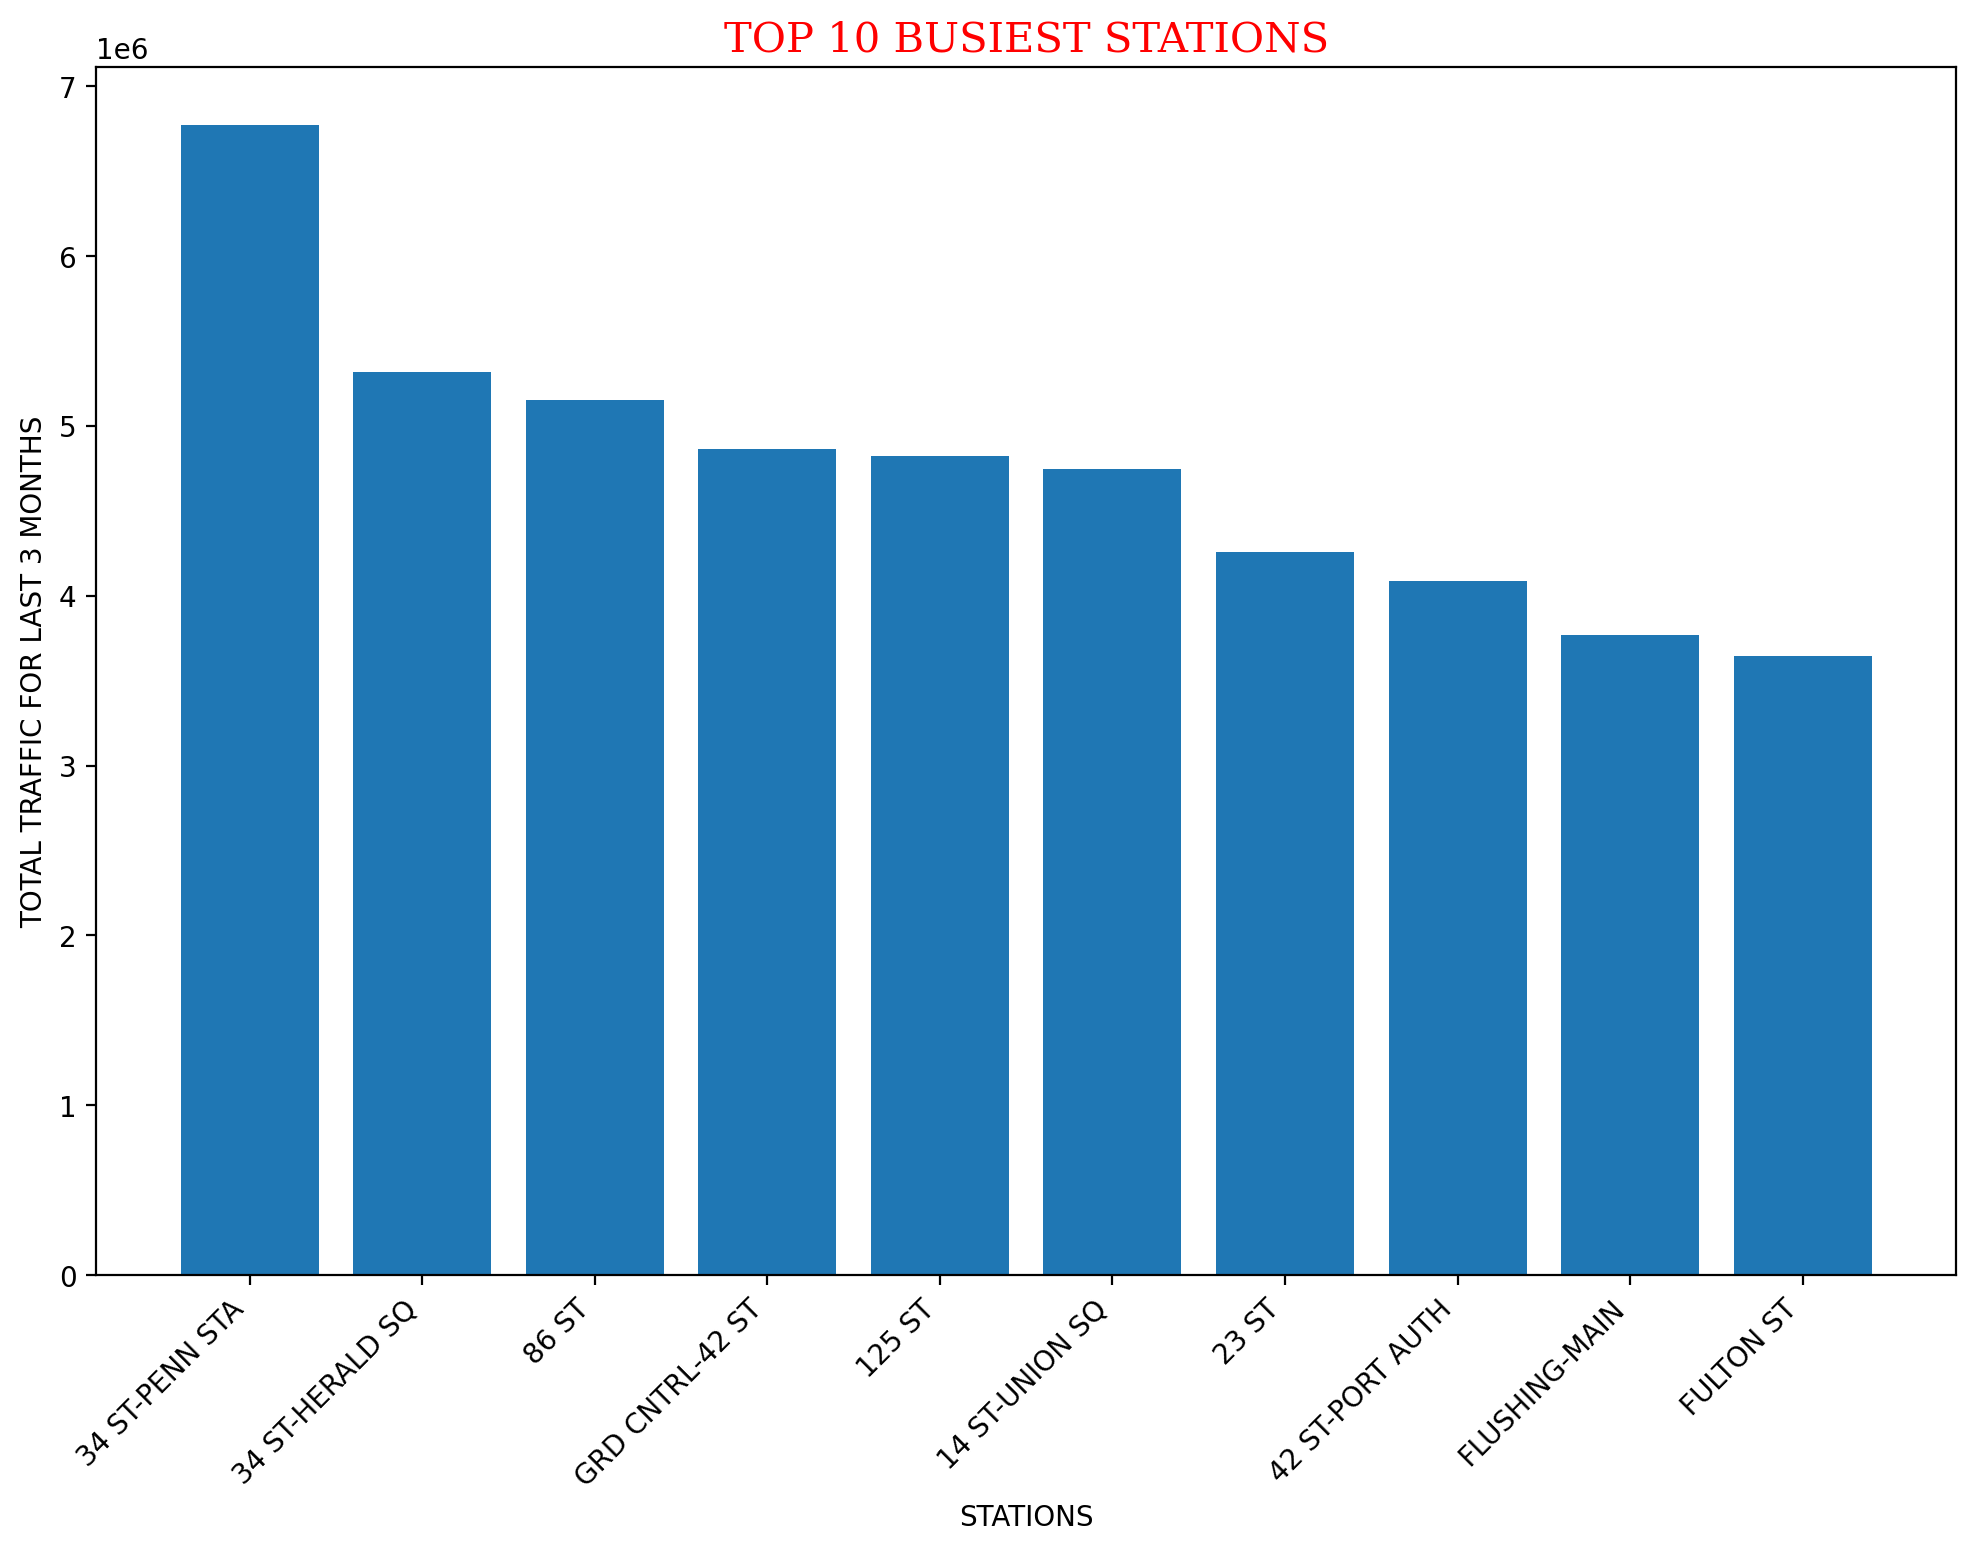

In [48]:
"""
plt.figure(figsize=(15,10),dpi=200)
plt.title("TOP 7 STATIONS IN THE TIME PERIOD")
sns.barplot(x = 'STATION', y = 'TRAFFIC', data = top_stations)
"""
plt.figure(figsize=(12,8),dpi=200)
plt.bar(busiest_stations.STATION, busiest_stations.TRAFFIC)
plt.xticks(rotation=45, ha='right');
plt.xlabel("STATIONS")
plt.ylabel("TOTAL TRAFFIC FOR LAST 3 MONTHS")
plt.title("TOP 10 BUSIEST STATIONS", family='serif',fontsize = 15,loc='center',color='r')

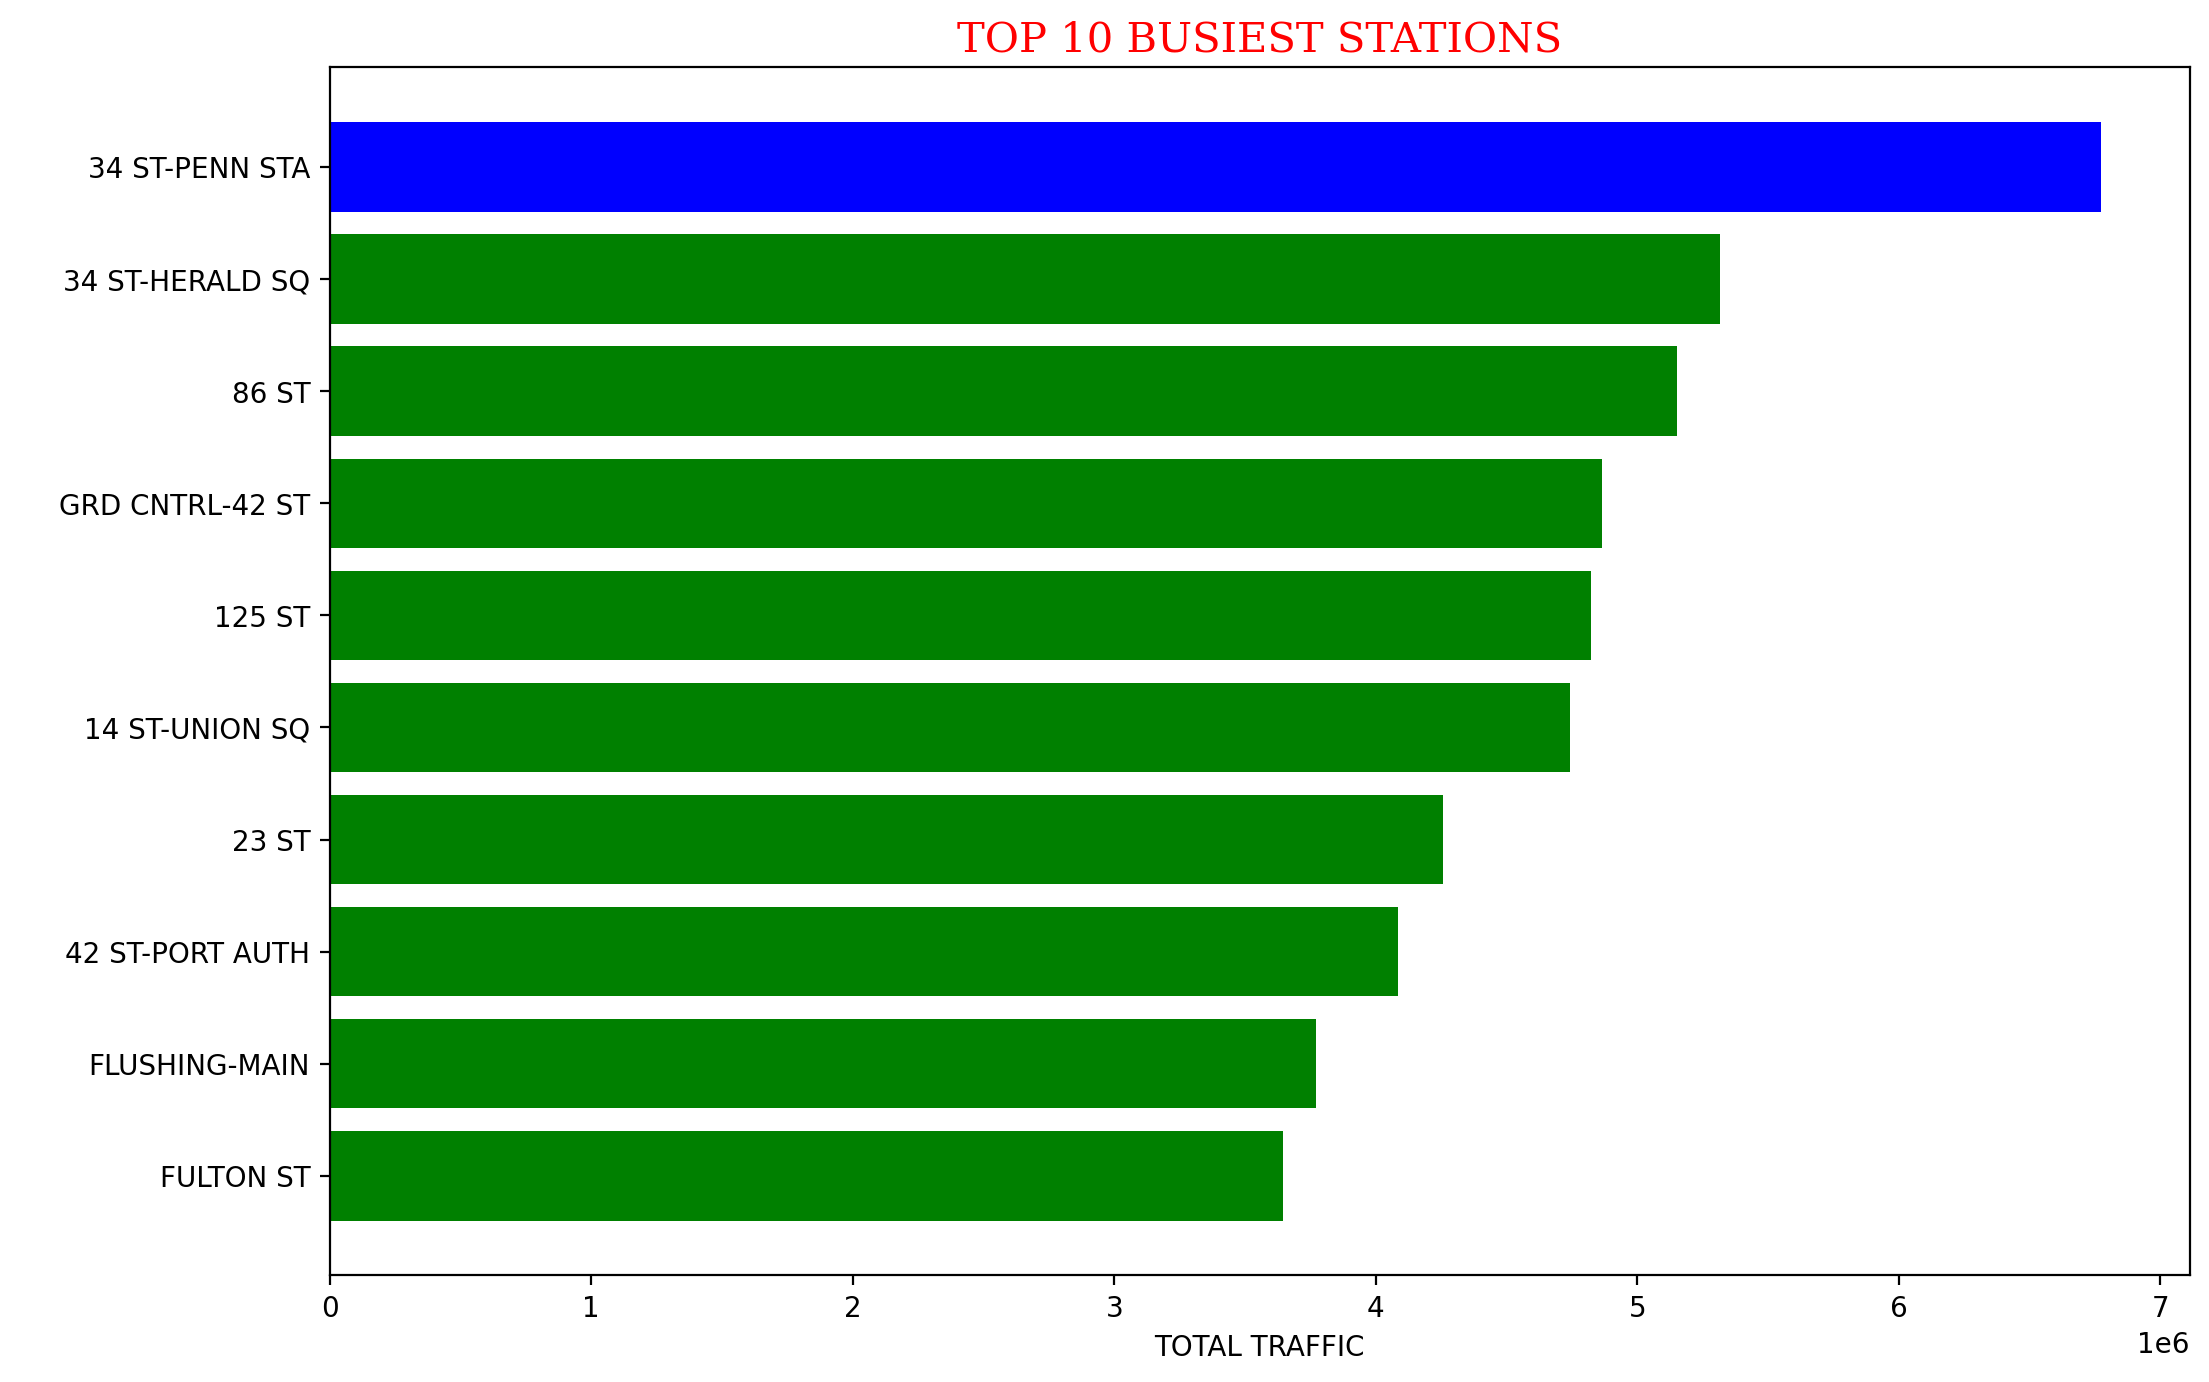

In [49]:
plt.figure(figsize=(12,8),dpi=200)
plt.barh(busiest_stations.STATION, busiest_stations.TRAFFIC, color=['blue', 'green', 'green', 'green', 'green','green','green','green','green','green']);
plt.gca().invert_yaxis()
plt.xlabel("TOTAL TRAFFIC")
plt.ylabel(" ")
plt.title("TOP 10 BUSIEST STATIONS", family='serif',fontsize = 15,loc='center',color='r')
plt.savefig(r"C:\Users\Fatih GÜLTÜRK\Desktop\MTA_görseller\Top10_Busiest_Stations(GRID).png", dpi=200)

Text(0.5, 1.0, 'TOP 10 BUSIEST STATIONS')

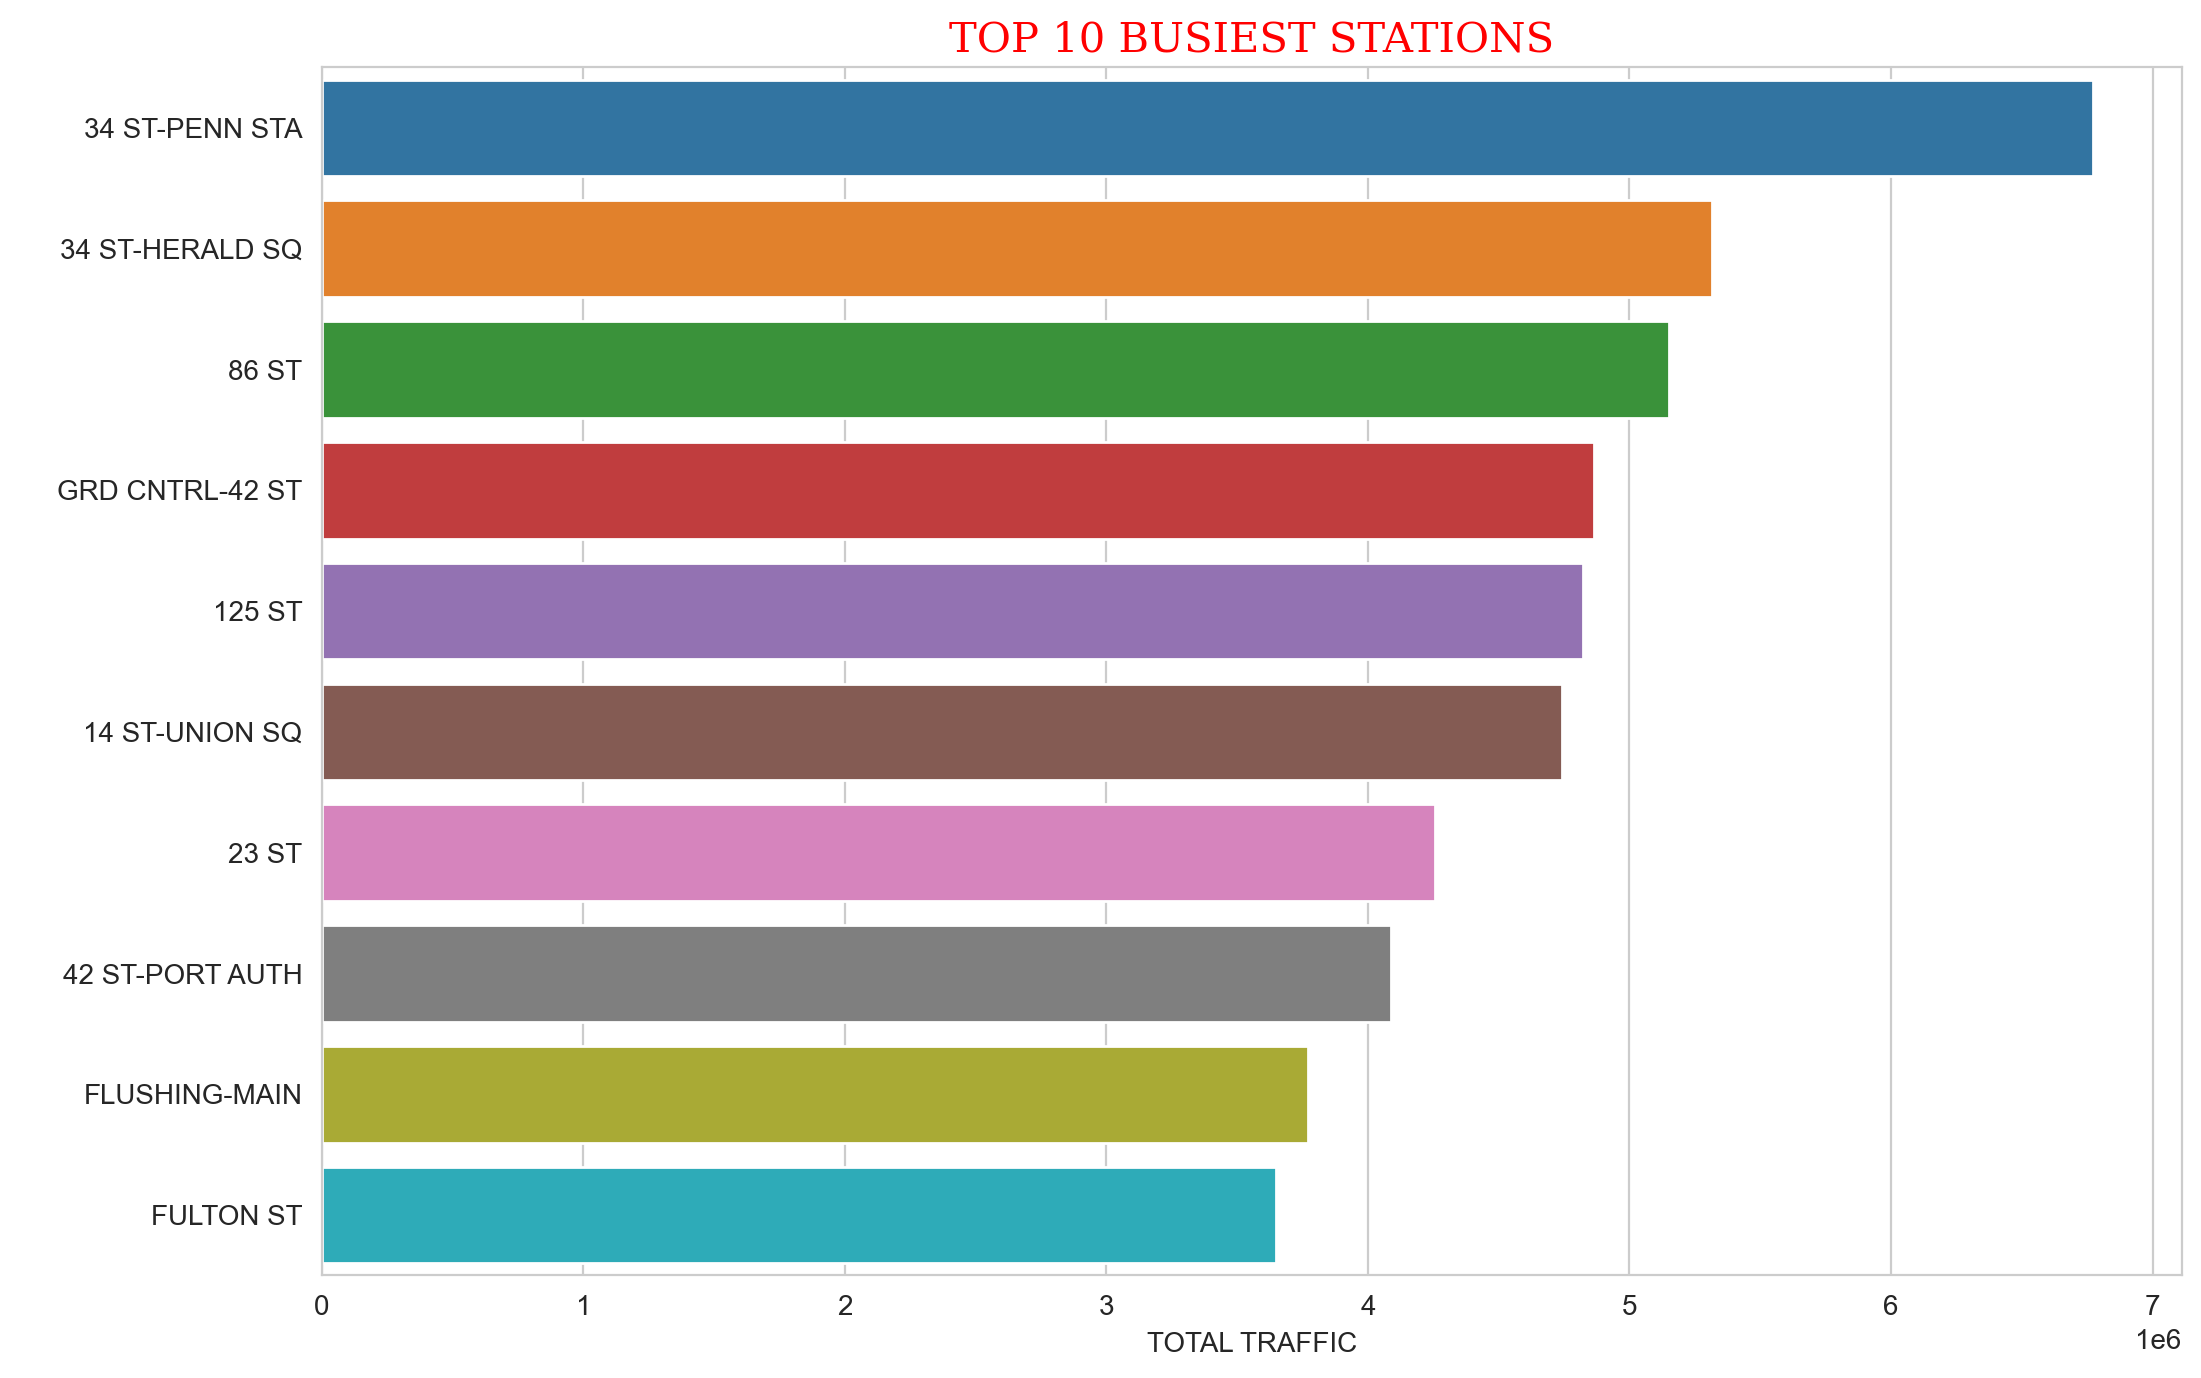

In [48]:
plt.figure(figsize=(12,8),dpi=200)
sns.set_style("whitegrid")
sns.barplot(y = 'STATION', x = 'TRAFFIC', data = busiest_stations)
plt.xlabel("TOTAL TRAFFIC")
plt.ylabel(" ")
plt.title("TOP 10 BUSIEST STATIONS", family='serif',fontsize = 15,loc='center',color='r')
#plt.savefig(r"C:\Users\Fatih GÜLTÜRK\Desktop\MTA_görseller\Top10_Busiest_Stations(GRID).png", dpi=200)

In [49]:
busiest_days = df.groupby("WEEK").sum().sort_values("TRAFFIC", ascending = False).reset_index()

#busiest_days = busiest_days.groupby("WEEK").sort_values(by=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

b1 = busiest_days[busiest_days['WEEK']=='Monday']
b2 = busiest_days[busiest_days['WEEK']=='Tuesday']
b3 = busiest_days[busiest_days['WEEK']=='Wednesday']
b4 = busiest_days[busiest_days['WEEK']=='Thursday']
b5 = busiest_days[busiest_days['WEEK']=='Friday']
b6 = busiest_days[busiest_days['WEEK']=='Saturday']
b7 = busiest_days[busiest_days['WEEK']=='Sunday']


busiest_days = pd.concat([b1,b2,b3,b4,b5,b6,b7], ignore_index = True)
busiest_days

,WEEK,d_Entries,d_Exits,TRAFFIC
0,Monday,21596893.0,22468784.0,44065677.0
1,Tuesday,22924122.0,23901349.0,46825471.0
2,Wednesday,22998357.0,23990674.0,46989031.0
3,Thursday,23040858.0,24064868.0,47105726.0
4,Friday,22297196.0,23202657.0,45499853.0
5,Saturday,15121676.0,17497582.0,32619258.0
6,Sunday,10927350.0,12934422.0,23861772.0


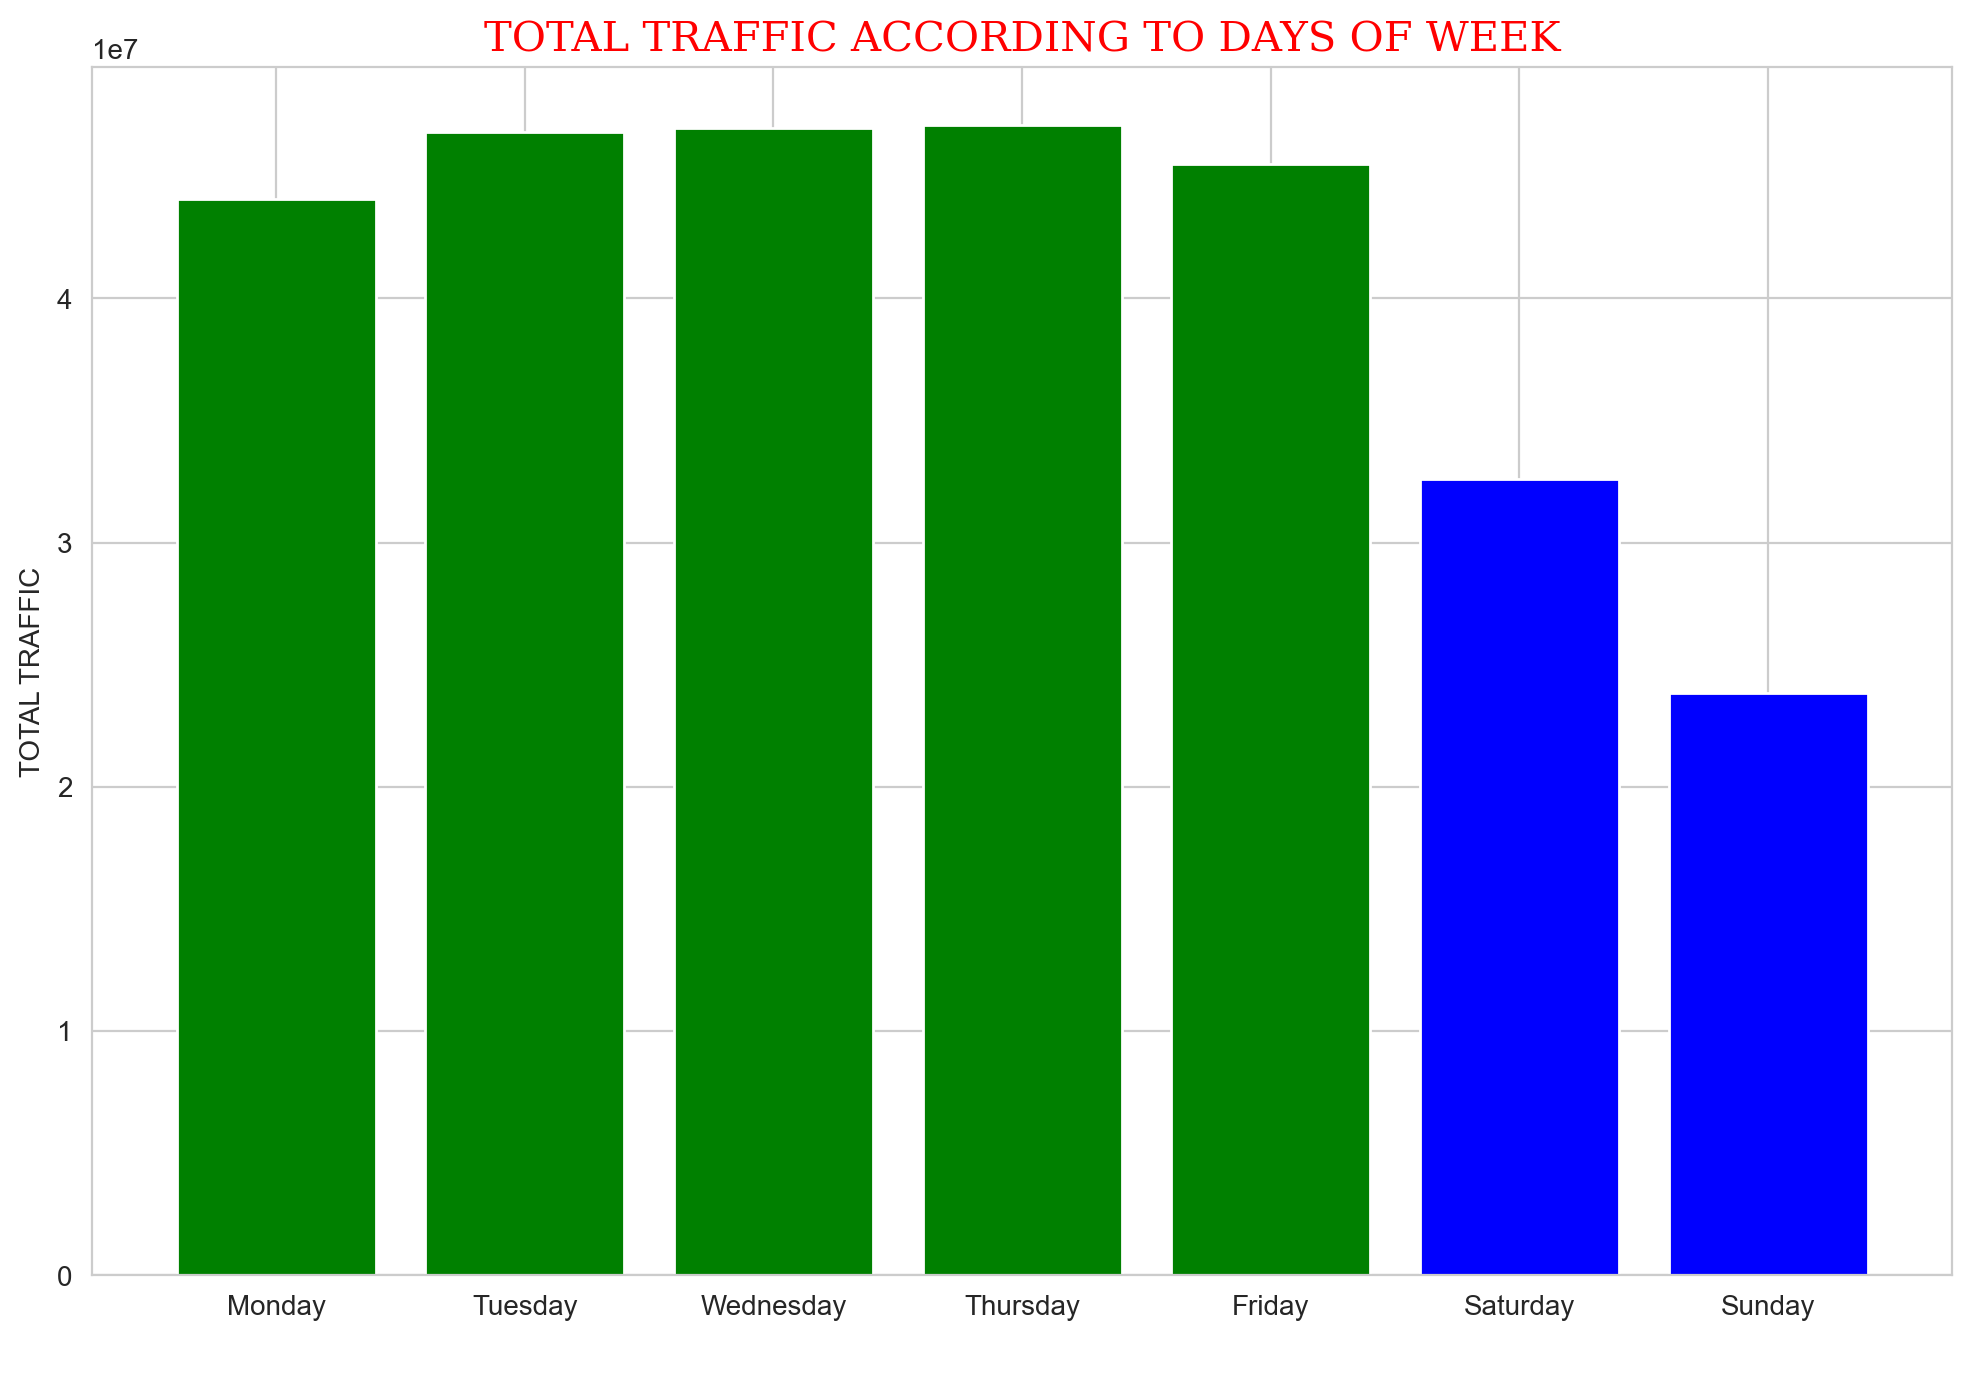

In [50]:
plt.figure(figsize=(12,8),dpi=200)
plt.bar(busiest_days.WEEK, busiest_days.TRAFFIC, color=['green', 'green', 'green', 'green', 'green','blue','blue']);
plt.xlabel(" ")
plt.ylabel("TOTAL TRAFFIC")
plt.title("TOTAL TRAFFIC ACCORDING TO DAYS OF WEEK", family='serif',fontsize = 15,loc='center',color='r')
plt.savefig(r"C:\Users\Fatih GÜLTÜRK\Desktop\MTA_görseller\Total_Traffic_AccTo_DaysOfWeek.png", dpi=200)

Text(0.5, 1.0, 'TOTAL TRAFFIC ACCORDING TO DAYS OF WEEK')

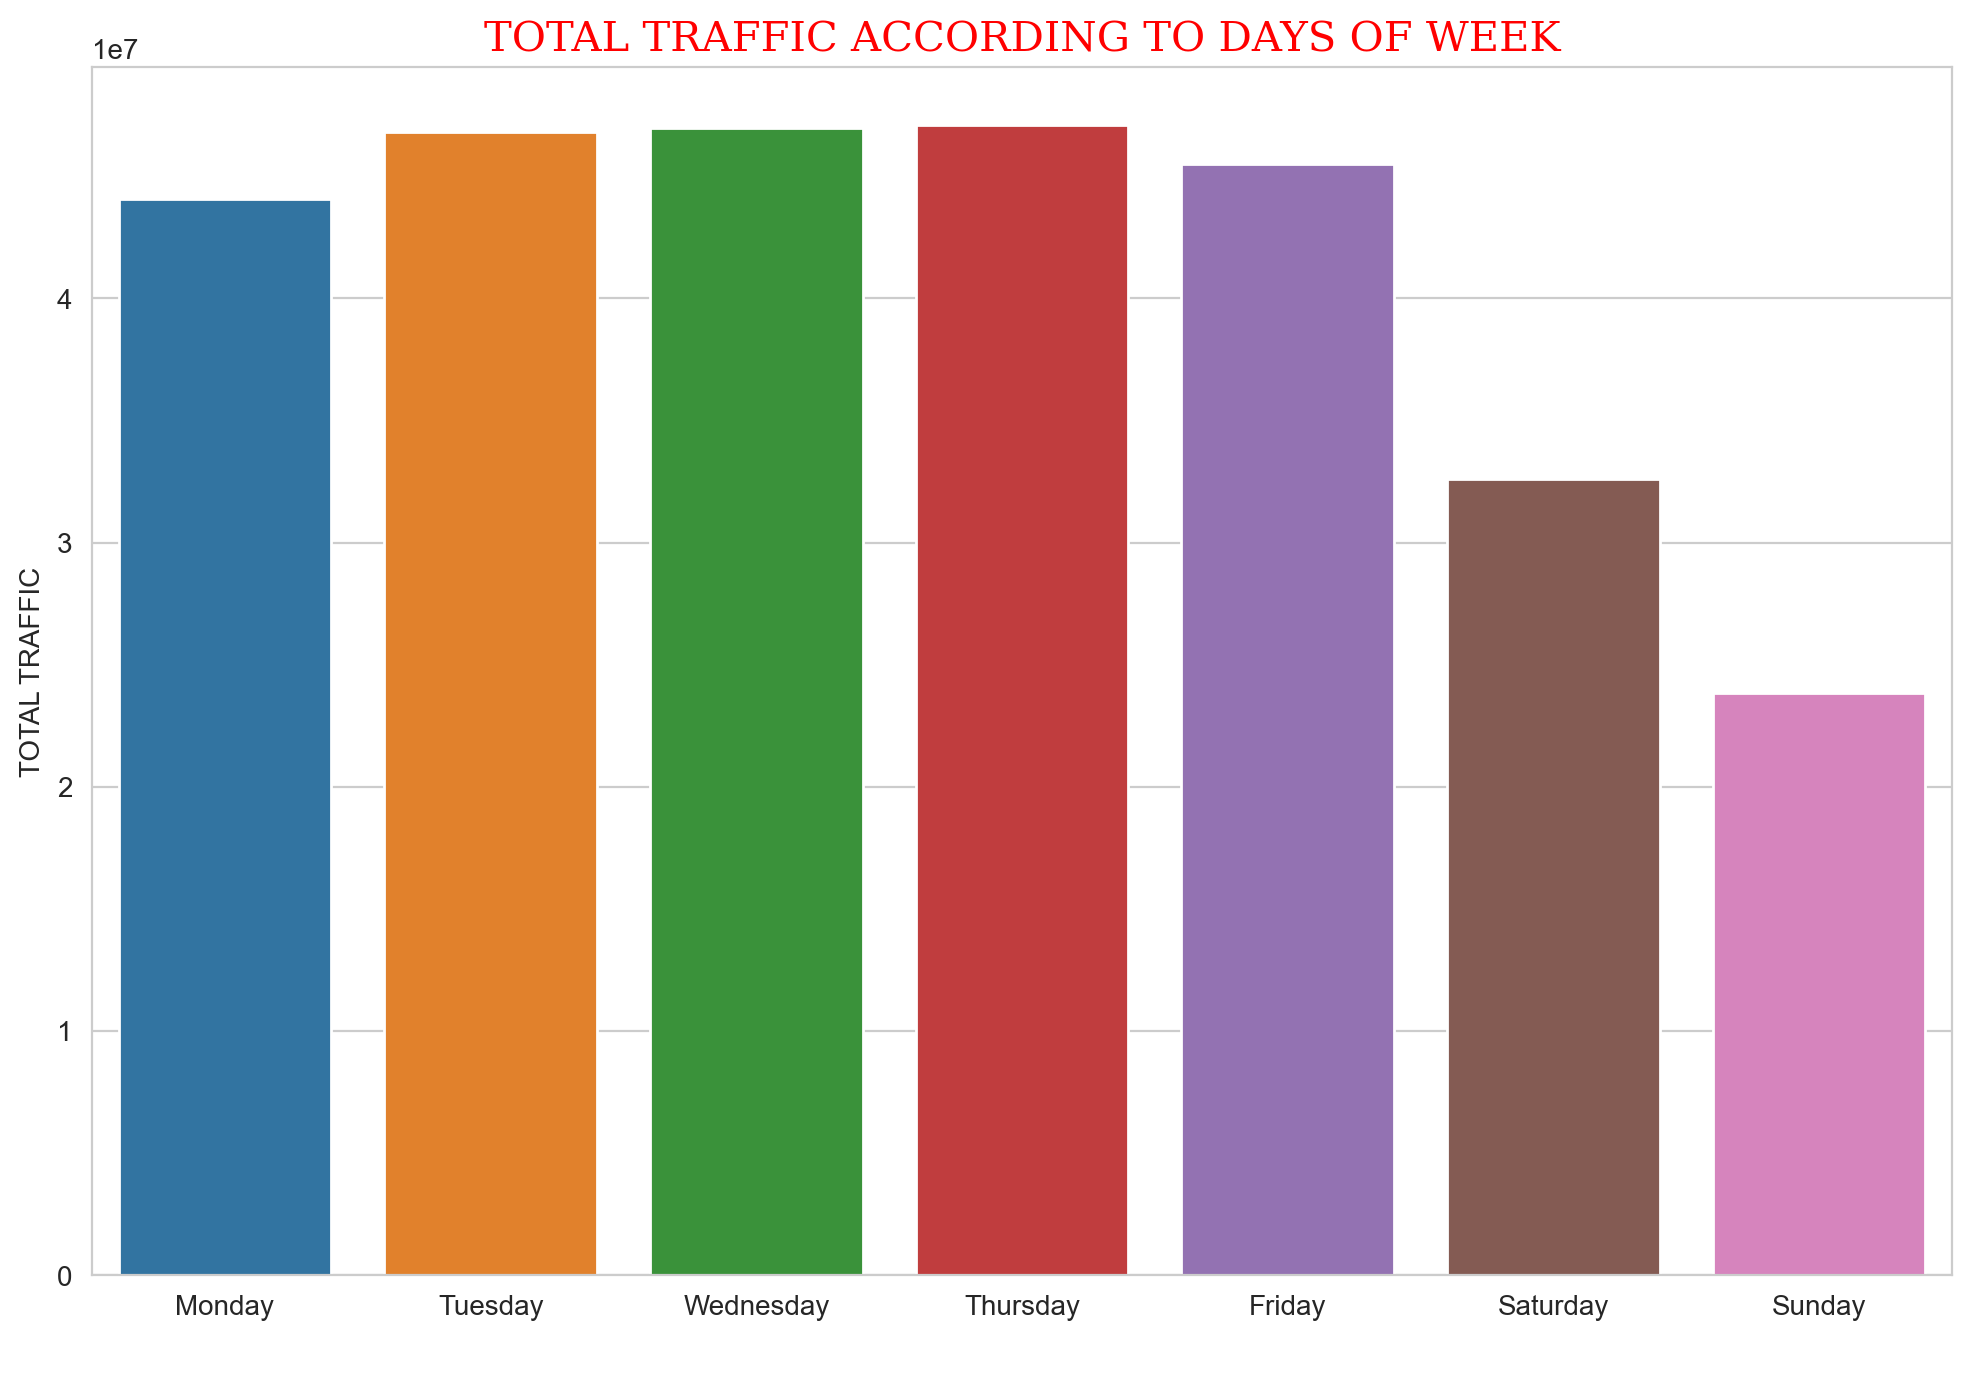

In [51]:
plt.figure(figsize=(12,8),dpi=200)
sns.set_style("whitegrid")
sns.barplot(x = 'WEEK', y = 'TRAFFIC', data = busiest_days, order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylabel("TOTAL TRAFFIC")
plt.xlabel(" ")
plt.title("TOTAL TRAFFIC ACCORDING TO DAYS OF WEEK", family='serif',fontsize = 15,loc='center',color='r')
#plt.savefig(r"C:\Users\Fatih GÜLTÜRK\Desktop\MTA_görseller\Total_Traffic_AccTo_DaysOfWeek.png", dpi=200)

In [68]:
busiest_times = df.groupby("TIME").sum().sort_values("TRAFFIC", ascending = False).reset_index()

for i in range(len(busiest_times)):
    
    if busiest_times['TIME'][i] < ('04:00:00'):
        busiest_times['TIME'][i] =  ('00:00 - 04:00')
    
    elif ('04:00:00') <= busiest_times['TIME'][i] < ('08:00:00'):
        busiest_times['TIME'][i] =  ('04:00 - 08:00')
    
    elif ('08:00:00') <= busiest_times['TIME'][i] < ('12:00:00'):
        busiest_times['TIME'][i] =  ('08:00 - 12:00')
    
    elif ('12:00:00') <= busiest_times['TIME'][i] < ('16:00:00'):
        busiest_times['TIME'][i] =  ('12:00 - 16:00')
    
    elif ('16:00:00') <= busiest_times['TIME'][i] < ('20:00:00'):
        busiest_times['TIME'][i] =  ('16:00 - 20:00')
    
    elif ('20:00:00') <= busiest_times['TIME'][i]:
        busiest_times['TIME'][i] =  ('20:00 - 00:00')
        
    i = i + 1

busiest_times

<ipython-input-68-dc290c2732fe>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  busiest_times['TIME'][i] =  ('16:00 - 20:00')
<ipython-input-68-dc290c2732fe>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  busiest_times['TIME'][i] =  ('12:00 - 16:00')
<ipython-input-68-dc290c2732fe>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  busiest_times['TIME'][i] =  ('08:00 - 12:00')
<ipython-input-68-dc290c2732fe>:9: SettingWithCopyWarni

,TIME,d_Entries,d_Exits,TRAFFIC
0,16:00 - 20:00,20692012.0,23465489.0,44157501.0
1,12:00 - 16:00,18584122.0,19104329.0,37688451.0
2,08:00 - 12:00,15733024.0,17709882.0,33442906.0
3,12:00 - 16:00,13006242.0,12461402.0,25467644.0
4,16:00 - 20:00,9935282.0,11757713.0,21692995.0
...,...,...,...,...
45823,08:00 - 12:00,1.0,1.0,2.0
45824,00:00 - 04:00,1.0,1.0,2.0
45825,20:00 - 00:00,1.0,1.0,2.0
45826,20:00 - 00:00,1.0,1.0,2.0


In [53]:
busiest_times = busiest_times.groupby("TIME").sum().sort_values("TRAFFIC", ascending = False).reset_index()
busiest_times

,TIME,d_Entries,d_Exits,TRAFFIC
0,12:00 - 16:00,38249726.0,38196257.0,76445983.0
1,16:00 - 20:00,33957165.0,38947223.0,72904388.0
2,08:00 - 12:00,28430579.0,31511028.0,59941607.0
3,04:00 - 08:00,25848241.0,22486303.0,48334544.0
4,20:00 - 00:00,9858703.0,13486466.0,23345169.0
5,00:00 - 04:00,2562038.0,3433059.0,5995097.0


Text(0.5, 1.0, 'TOTAL TRAFFIC ACCORDING TO TIMES OF DAY')

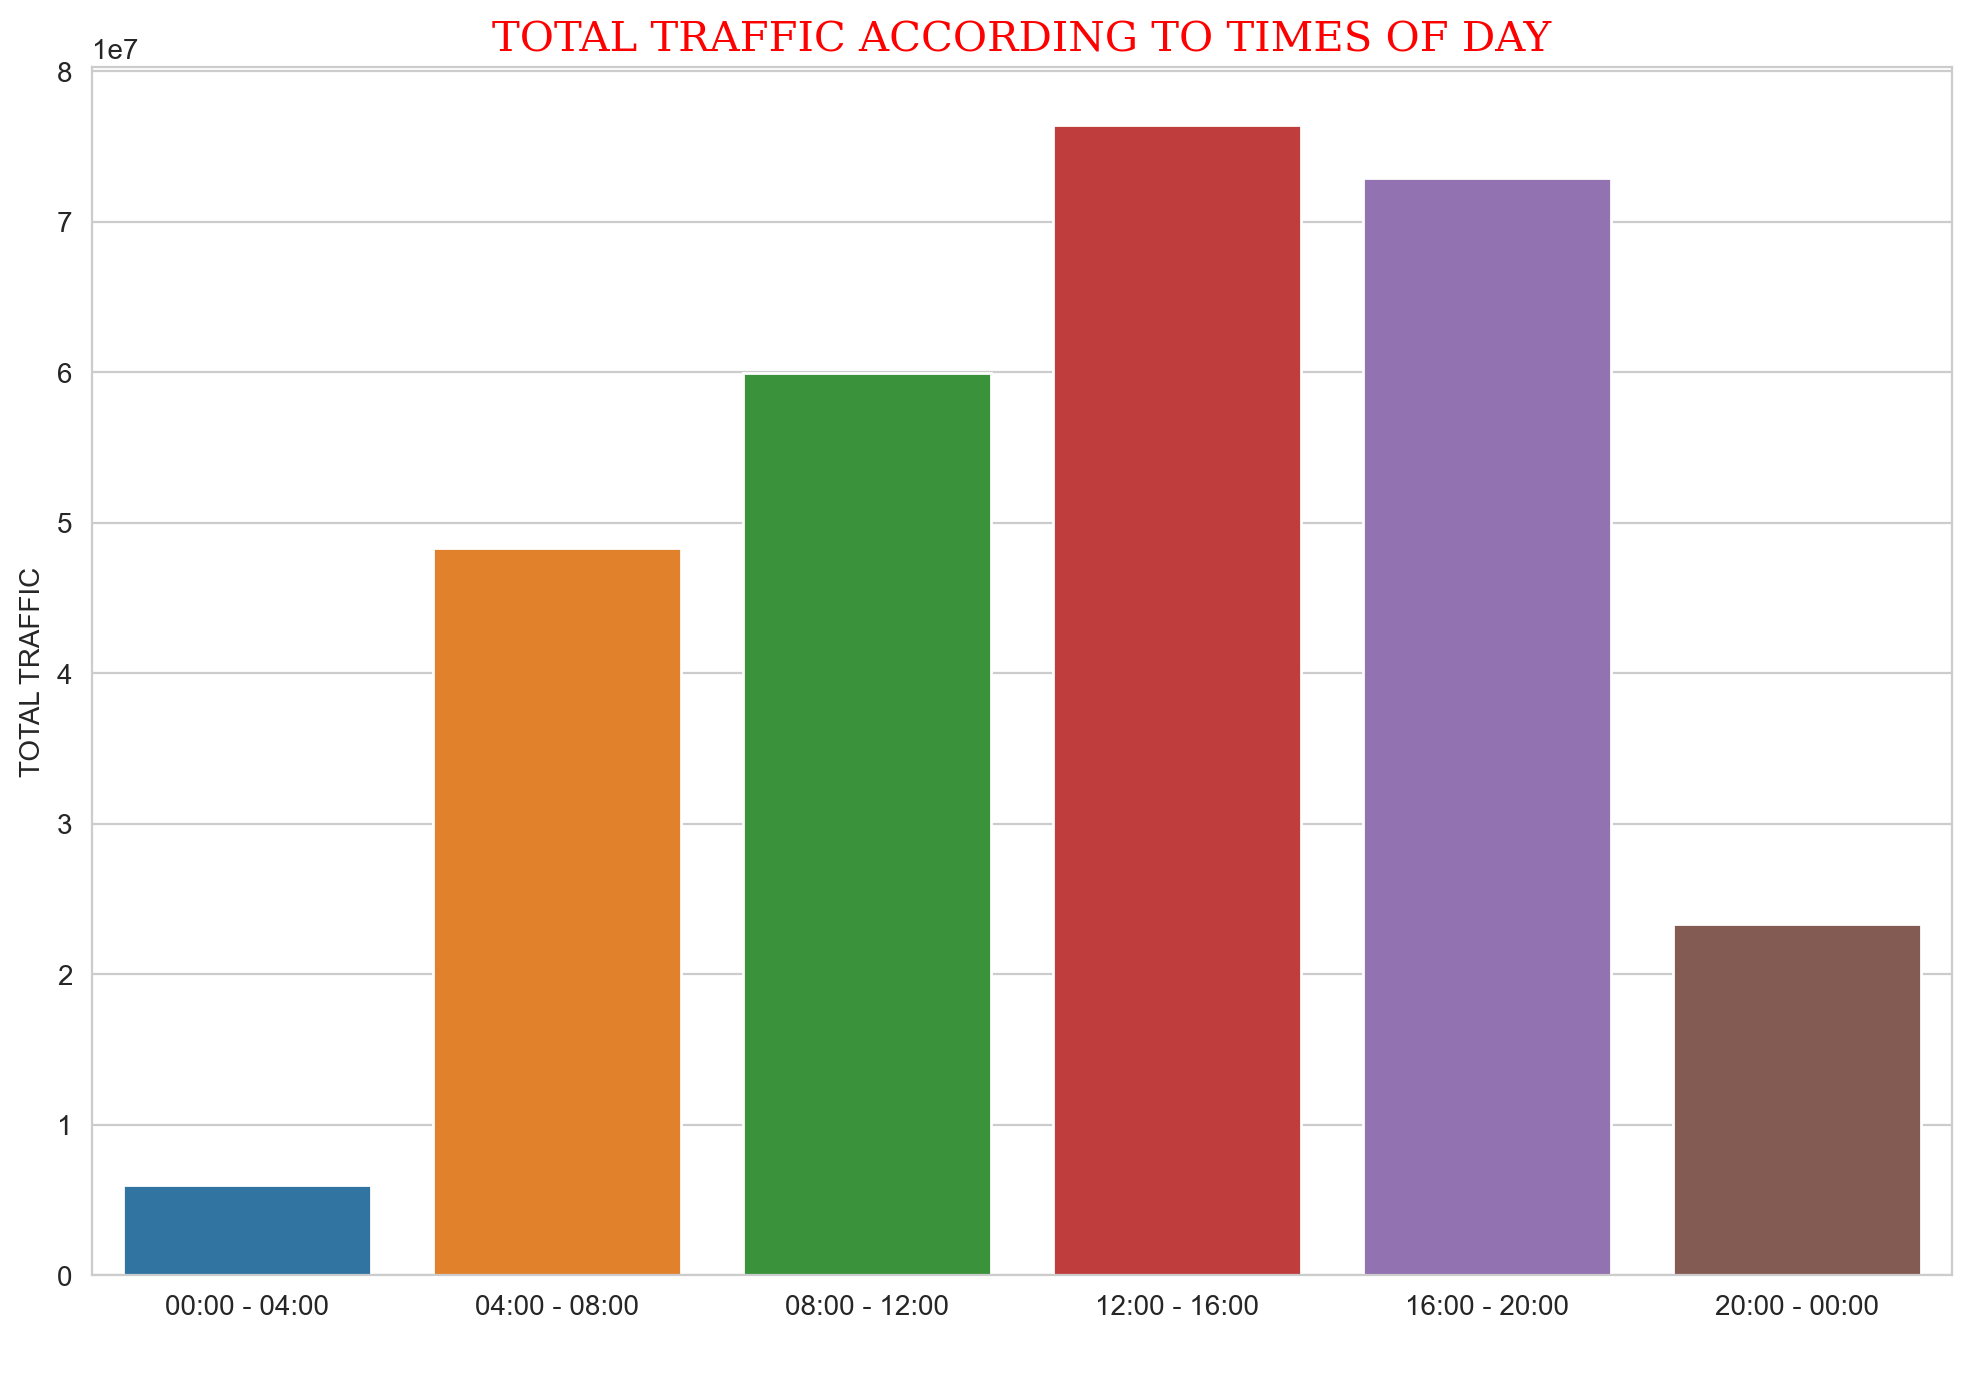

In [54]:
plt.figure(figsize=(12,8),dpi=200)
sns.set_style("whitegrid")

sns.barplot(x = 'TIME', y = 'TRAFFIC', data = busiest_times, order = ['00:00 - 04:00', '04:00 - 08:00', '08:00 - 12:00', '12:00 - 16:00', '16:00 - 20:00', '20:00 - 00:00'])
plt.xlabel(" ")
plt.ylabel("TOTAL TRAFFIC")
plt.title("TOTAL TRAFFIC ACCORDING TO TIMES OF DAY", family='serif',fontsize = 15,loc='center',color='r')
#plt.savefig(r"C:\Users\Fatih GÜLTÜRK\Desktop\MTA_görseller\Total_Traffic_AccTo_TımesOfDay.png", dpi=200)

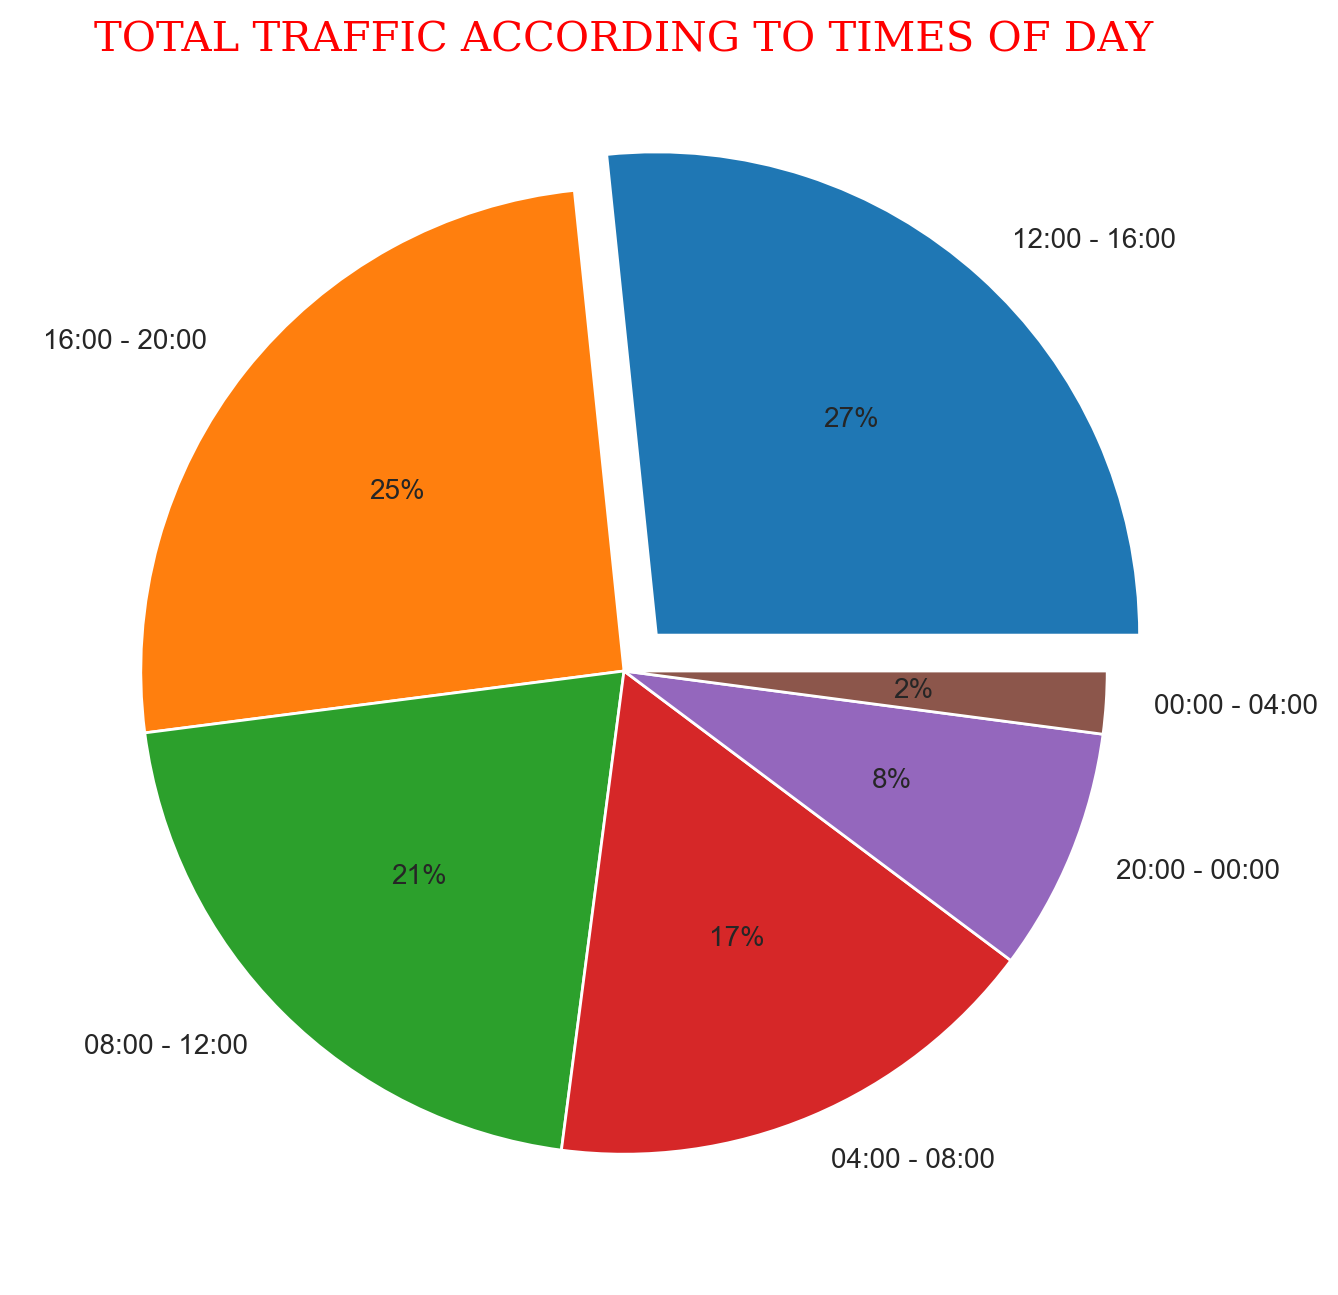

In [55]:
plt.figure(figsize=(12,8),dpi=200)

plt.pie(busiest_times.TRAFFIC,labels= busiest_times.TIME, autopct='%.0f%%', explode = [.1,0,0,0,0,0])
plt.title("TOTAL TRAFFIC ACCORDING TO TIMES OF DAY", family='serif',fontsize = 15,loc='center',color='r')
plt.savefig(r"C:\Users\Fatih GÜLTÜRK\Desktop\MTA_görseller\Most_Busiest_TimesOfDay.png", dpi=200)

In [56]:
busiest_stations_week = df.groupby(["STATION", "WEEK"]).sum().sort_values("TRAFFIC", ascending = False).reset_index()
busiest_stations_week1 = busiest_stations_week.sort_values("STATION").groupby(["WEEK"])
busiest_stations_week1.head(2)

,STATION,WEEK,d_Entries,d_Exits,TRAFFIC
288,1 AV,Tuesday,89409.0,142288.0,231697.0
526,1 AV,Sunday,53169.0,94407.0,147576.0
282,1 AV,Thursday,92671.0,145127.0,237798.0
285,1 AV,Wednesday,90598.0,144618.0,235216.0
304,1 AV,Friday,83020.0,139063.0,222083.0
313,1 AV,Monday,84012.0,133228.0,217240.0
336,1 AV,Saturday,74067.0,130735.0,204802.0
192,103 ST,Thursday,145866.0,147293.0,293159.0
193,103 ST,Wednesday,144839.0,147906.0,292745.0
200,103 ST,Tuesday,144412.0,146378.0,290790.0


In [57]:
"""
huee = busiest_stations['STATION'].head(7)
xlabel = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ylabel = ["TRAFFIC"]
sns.lineplot(x=xlabel, y=ylabel, hue=huee, data=busiest_stations_week1)
"""

'\nhuee = busiest_stations[\'STATION\'].head(7)\nxlabel = [\'Monday\',\'Tuesday\',\'Wednesday\',\'Thursday\',\'Friday\',\'Saturday\',\'Sunday\']\nylabel = ["TRAFFIC"]\nsns.lineplot(x=xlabel, y=ylabel, hue=huee, data=busiest_stations_week1)\n'

In [58]:
busiest_stations_week['WEEK']

0        Thursday
1       Wednesday
2         Tuesday
3          Friday
4          Monday
          ...    
2624     Saturday
2625       Monday
2626       Friday
2627     Thursday
2628    Wednesday
Name: WEEK, Length: 2629, dtype: object

In [59]:
station1 = df[df['STATION'] == '34 ST-PENN STA']
station1

,STATION,LINENAME,DATE,TIME,TURNSTILE,d_Entries,d_Exits,DATETIME,TRAFFIC,WEEK
140148,34 ST-PENN STA,123ACE,05/28/2021,18:00:00,R142R29301-06-01,33.0,59.0,2021-05-28 18:00:00,92.0,Friday
140147,34 ST-PENN STA,123ACE,05/28/2021,14:00:00,R142R29301-06-01,68.0,111.0,2021-05-28 14:00:00,179.0,Friday
140146,34 ST-PENN STA,123ACE,05/28/2021,10:00:00,R142R29301-06-01,47.0,103.0,2021-05-28 10:00:00,150.0,Friday
140145,34 ST-PENN STA,123ACE,05/28/2021,06:00:00,R142R29301-06-01,24.0,81.0,2021-05-28 06:00:00,105.0,Friday
140144,34 ST-PENN STA,123ACE,05/28/2021,02:00:00,R142R29301-06-01,2.0,3.0,2021-05-28 02:00:00,5.0,Friday
...,...,...,...,...,...,...,...,...,...,...
55103,34 ST-PENN STA,ACE,02/27/2021,19:00:00,N067R01200-00-00,11.0,21.0,2021-02-27 19:00:00,32.0,Saturday
55102,34 ST-PENN STA,ACE,02/27/2021,15:00:00,N067R01200-00-00,48.0,50.0,2021-02-27 15:00:00,98.0,Saturday
55101,34 ST-PENN STA,ACE,02/27/2021,11:00:00,N067R01200-00-00,53.0,43.0,2021-02-27 11:00:00,96.0,Saturday
55100,34 ST-PENN STA,ACE,02/27/2021,07:00:00,N067R01200-00-00,17.0,55.0,2021-02-27 07:00:00,72.0,Saturday


In [70]:
station1['TIME'][station1['TIME'].index[0]]

140148    18:00:00
140148    18:00:00
140148    10:00:00
140148    22:00:00
140148    06:00:00
140148    22:00:00
140148    17:00:00
140148    11:00:00
140148    12:00:00
140148    04:00:00
Name: TIME, dtype: object

In [69]:
for i in range(len(station1['TIME'].index)):
    
    if station1['TIME'][station1['TIME'].index[i]] < ('04:00:00'):
        station1['TIME'][station1['TIME'].index[i]] =  ('00:00 - 04:00')
    
    elif ('04:00:00') <= station1['TIME'][station1['TIME'].index[i]] < ('08:00:00'):
        station1['TIME'][station1['TIME'].index[i]] =  ('04:00 - 08:00')
    
    elif ('08:00:00') <= station1['TIME'][station1['TIME'].index[i]] < ('12:00:00'):
        station1['TIME'][station1['TIME'].index[i]] =  ('08:00 - 12:00')
    
    elif ('12:00:00') <= station1['TIME'][station1['TIME'].index[i]] < ('16:00:00'):
        station1['TIME'][station1['TIME'].index[i]] =  ('12:00 - 16:00')
    
    elif ('16:00:00') <= station1['TIME'][station1['TIME'].index[i]] < ('20:00:00'):
        station1['TIME'][station1['TIME'].index[i]] =  ('16:00 - 20:00')
    
    elif ('20:00:00') <= station1['TIME'][station1['TIME'].index[i]]:
        station1['TIME'][station1['TIME'].index[i]] =  ('20:00 - 00:00')
        
    i = i + 1
    
station1

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [65]:
bt_of_s1 = station1.groupby("TIME").sum().sort_values("TRAFFIC", ascending = False).reset_index()

bt_of_s1

,TIME,d_Entries,d_Exits,TRAFFIC
0,16:00:00,526514.0,697101.0,1223615.0
1,12:00:00,415296.0,645782.0,1061078.0
2,08:00:00,331757.0,489779.0,821536.0
3,14:00:00,196725.0,357827.0,554552.0
4,04:00:00,263989.0,274838.0,538827.0
5,06:00:00,234544.0,184804.0,419348.0
6,10:00:00,140735.0,201962.0,342697.0
7,20:00:00,163078.0,178757.0,341835.0
8,18:00:00,135616.0,165441.0,301057.0
9,15:00:00,94214.0,133793.0,228007.0


In [66]:
bd_of_s1 = station1.groupby(["WEEK","TIME"]).sum().sort_values("TRAFFIC", ascending = False).reset_index()

s1 = bd_of_s1[bd_of_s1['WEEK']=='Monday']
s2 = bd_of_s1[bd_of_s1['WEEK']=='Tuesday']
s3 = bd_of_s1[bd_of_s1['WEEK']=='Wednesday']
s4 = bd_of_s1[bd_of_s1['WEEK']=='Thursday']
s5 = bd_of_s1[bd_of_s1['WEEK']=='Friday']
s6 = bd_of_s1[bd_of_s1['WEEK']=='Saturday']
s7 = bd_of_s1[bd_of_s1['WEEK']=='Sunday']


bd_of_s1 = pd.concat([s1,s2,s3,s4,s5,s6,s7], ignore_index = True)

bd_of_s1

,WEEK,TIME,d_Entries,d_Exits,TRAFFIC
0,Monday,16:00:00,81935.0,104317.0,186252.0
1,Monday,12:00:00,62589.0,94265.0,156854.0
2,Monday,08:00:00,52350.0,73171.0,125521.0
3,Monday,04:00:00,53094.0,50983.0,104077.0
4,Monday,14:00:00,29388.0,55481.0,84869.0
...,...,...,...,...,...
186,Sunday,21:00:00,1192.0,1208.0,2400.0
187,Sunday,23:00:00,710.0,1418.0,2128.0
188,Sunday,02:00:00,641.0,1477.0,2118.0
189,Sunday,03:00:00,642.0,1423.0,2065.0


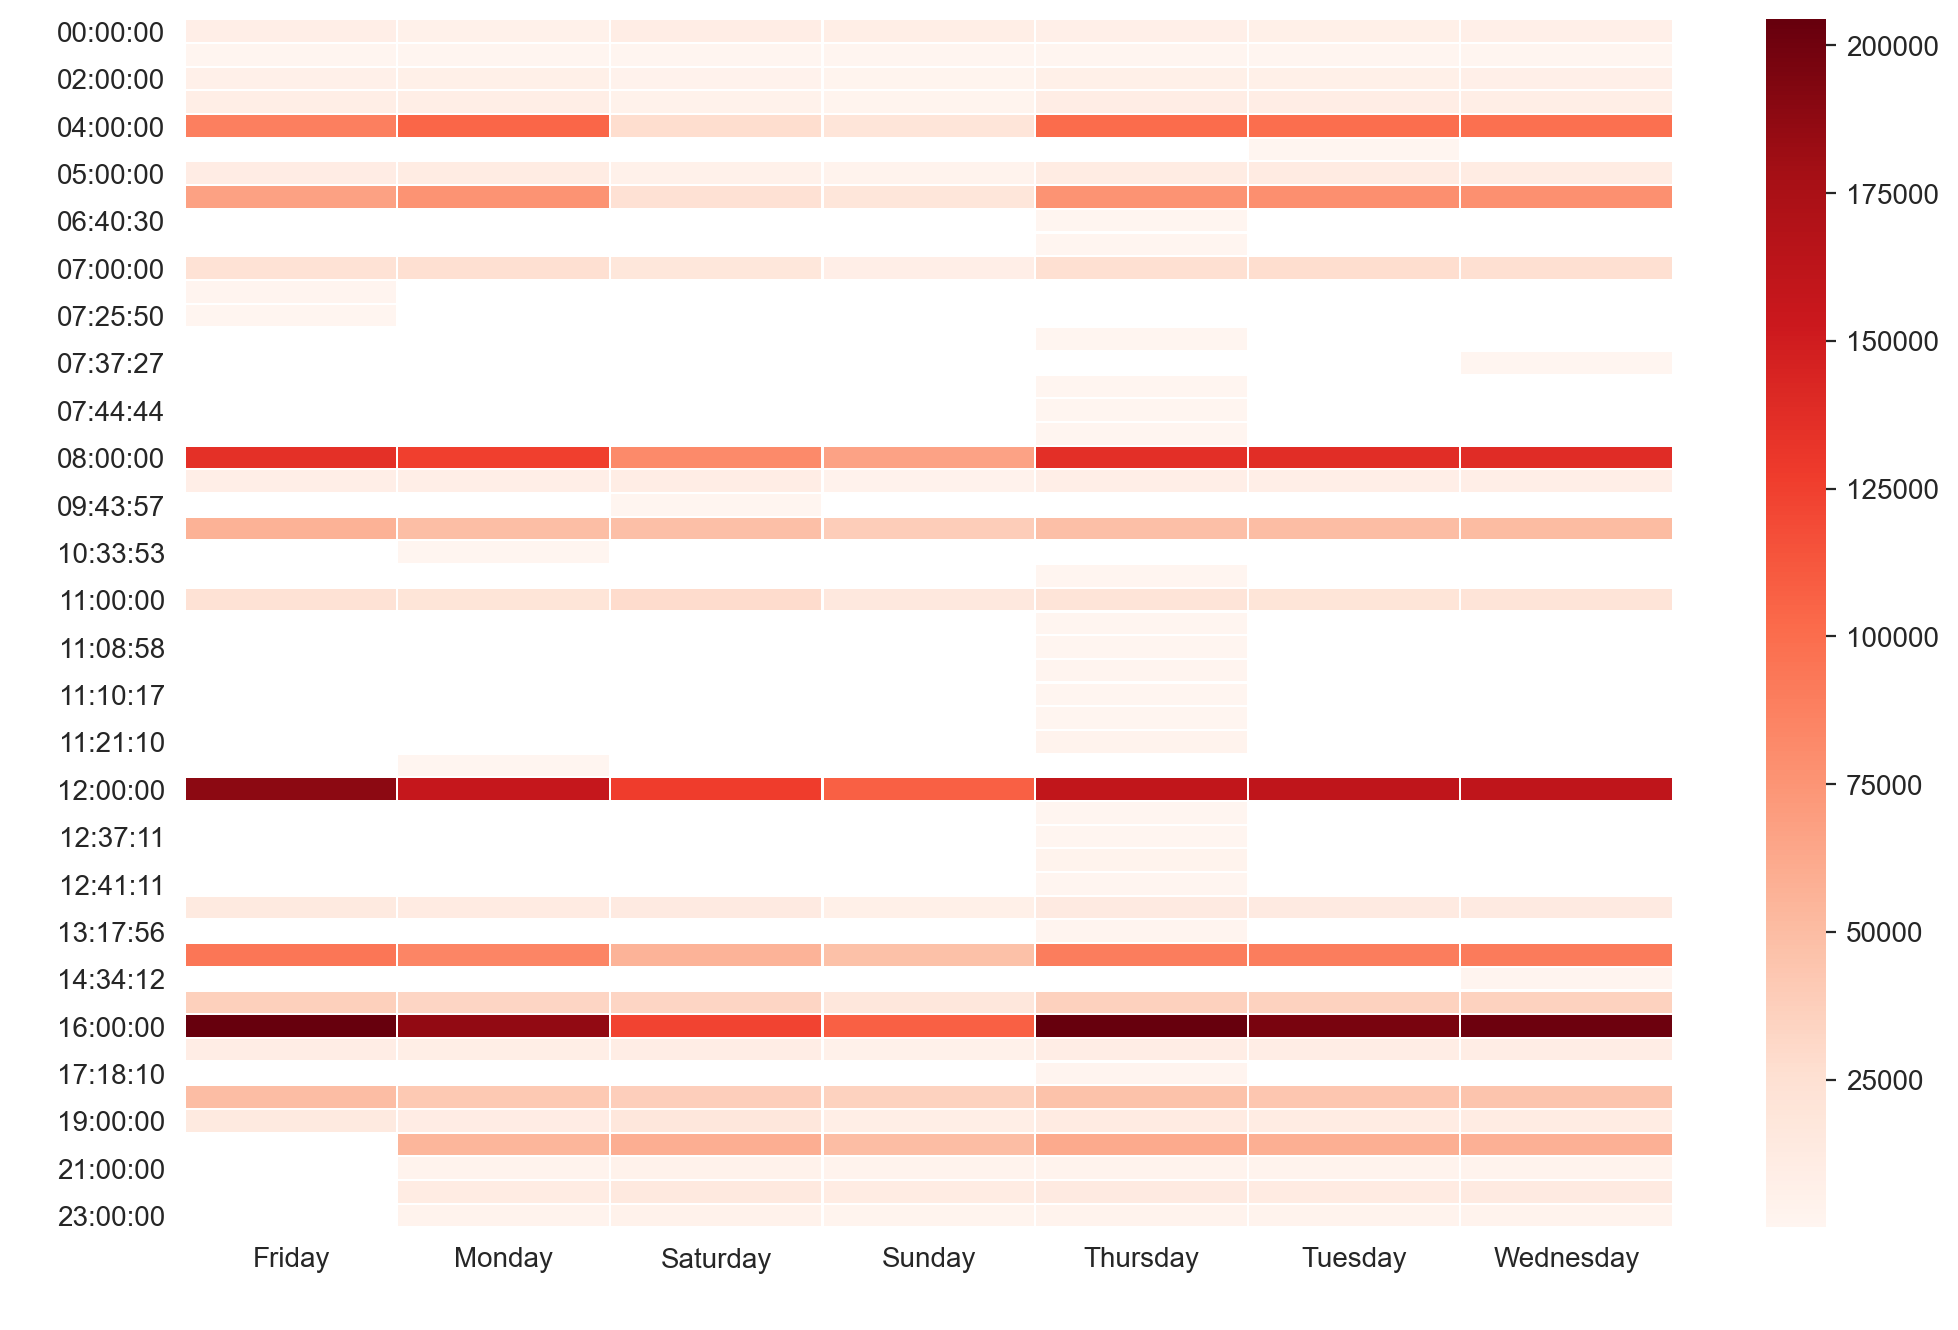

<Figure size 432x288 with 0 Axes>

In [67]:
plt.figure(figsize=(12,8),dpi=200)
"""
df_wide = pd.pivot_table(bd_of_s1, index="TIME", columns="WEEK", values='TRAFFIC')
sns.heatmap(df_wide, cmap="Blues")

#df_wide.columns = pd.CategoricalIndex(df_wide.columns, categories= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
#df_wide.sort_values(level=0, inplace=True)
#labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#cmap="YlOrRd"

df_wide.sort_index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.heatmap(df_wide, cmap="Blues")

"""
revels = bd_of_s1.pivot("TIME", "WEEK", "TRAFFIC")
ax = sns.heatmap(revels, linewidths=0.4, cmap="Reds")

revels.index = pd.CategoricalIndex(revels.index, categories= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
revels.sort_index(level=0, inplace=True)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

plt.savefig(r"C:\Users\Fatih GÜLTÜRK\Desktop\MTA_görseller\He.png", dpi=200)


In [75]:
station1['WEEK']

140148      Friday
140147      Friday
140146      Friday
140145      Friday
140144      Friday
            ...   
55103     Saturday
55102     Saturday
55101     Saturday
55100     Saturday
55099     Saturday
Name: WEEK, Length: 46483, dtype: object